In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/새싹프로젝트1/data')

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 93.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import koreanize_matplotlib
from datetime import datetime, timedelta
import time
import dateutil
import geopandas as gp
from matplotlib import font_manager, rc

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

# [1] 데이터 확인하기

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
reviews.shape

(99224, 7)

In [ ]:
reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
reviews.loc[:, ['review_comment_title', 'review_comment_message']]

,review_comment_title,review_comment_message
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,Recebi bem antes do prazo estipulado.
4,NaN,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99219,NaN,NaN
99220,NaN,NaN
99221,NaN,"Excelente mochila, entrega super rápida. Super..."
99222,NaN,NaN


# [2] 배송소요일 계산

In [ ]:
# 날짜 연산을 위한 데이터 연산
cols = ['order_purchase_timestamp',
        'order_delivered_customer_date',
        'order_estimated_delivery_date']

for col in cols:
  orders[col] = pd.to_datetime(orders[col])

In [ ]:
orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


In [ ]:
# 실제 배송 소요일 컬럼 생성
orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 86400
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037


In [ ]:
# 예상 배송 소요일 컬럼 생성
orders['delivery_delay_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.total_seconds() / 86400
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729


In [ ]:
# 배송이 완료되지 않은 3% 결측치 분리
df_main = orders[orders['order_delivered_customer_date'].notna()].copy()
df_unknown = orders[orders['order_delivered_customer_date'].isna()].copy()
df_main

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,-10.369433
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,-1.265324
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,-5.524803
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,-20.018819


In [ ]:
# 배달 상태 분화
def delivery_label(x):
    if x < 0:
        return 'early'
    elif x == 0:
        return 'on_time'
    else:
        return 'delayed'

df_main['delivery_status'] = df_main['delivery_delay_days'].apply(delivery_label)
df_main['delivery_status'].value_counts()

,count
delivery_status,
early,88649
delayed,7827


In [ ]:
# 리뷰 점수를 order행과 병합
df_main = df_main.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')
df_main

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,delivery_status,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,early,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,early,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,early,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,early,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,early,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97000,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,-10.369433,early,5.0
97001,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,-1.265324,early,4.0
97002,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,-5.524803,early,5.0
97003,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,-20.018819,early,2.0


## (1) 시각화
> 배송 상태별 리뷰 점수 (도입부 한 방)그래프

Bar chart

X: delivery_status (early / **delayed**)

Y: review_score 평균 (groupby - delivery_status이용)

In [ ]:
df_main.shape

(97005, 12)

In [ ]:
# 배송 속도에 따른 리뷰 스코어
df_main.groupby('delivery_status')['review_score'].mean().round(1)

,review_score
delivery_status,
delayed,2.6
early,4.3


In [ ]:
df_main.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1
order_delivered_customer_date,0
order_estimated_delivery_date,0
delivery_days,0
delivery_delay_days,0


In [ ]:
df_main['review_score'].isnull().sum()

np.int64(646)

In [ ]:
# 리뷰 점수 분포에 따른 배달 지연 일수의 평균
delay_by_score = (
    df_main
    .groupby('review_score')['delivery_delay_days']
    .mean()
    .reindex([1,2,3,4,5])
)
delay_by_score

,delivery_delay_days
review_score,
1,-3.370628
2,-7.938027
3,-10.078493
4,-11.684076
5,-12.688362


## (2) 시각화
> 뷰 점수별 평균 배송 지연일 그래프

Line chart or Bar chart

X: review_score (1~5)

Y: delivery_delay_days 평균

낮은 리뷰 점수일수록 평균적으로 더 늦게 도착한다

→ “배송 지연 ↔ 만족도”의 연속적 관계를 보여줌.

* tip  

-review_score를 1 or 0.5 단위로 구간을 자름  

-delivery_delay_days 집계평균으로 계산

# [3] 지역별 배송소요일에 대한 대시보드 구축

In [ ]:
# 1) 컬럼 준비 orders, customers의 각 테이블에서 필요한 행 차출
cst_cols = ['customer_id', 'customer_state']

df_kpi_base = (
    df_main
    .merge(
        customers[cst_cols],
        on='customer_id',
        how='left',
        validate='m:1'
    )
)

In [ ]:
# 2) KPI에 필요한 컬럼만 선택
df_kpi = df_kpi_base[
    [
        'order_id',               # 주문 횟수 집계용
        'customer_state',
        'delivery_delay_days',    # (+)지연 / (-)조기
        'review_score'
    ]
].copy()


In [ ]:
# 3) 배송 미도착(지연 계산 불가) 행 제외
df_kpi = df_kpi[df_kpi['delivery_delay_days'].notna()].copy()

# 4) 파생 변수
df_kpi['is_delayed'] = df_kpi['delivery_delay_days'] > 0
df_kpi['is_early']   = df_kpi['delivery_delay_days'] < 0

df_kpi['late_delivered'] = df_kpi['delivery_delay_days'].clip(lower=0)
df_kpi['early_delivered'] = (
    df_kpi['delivery_delay_days']
    .clip(upper=0)
    .abs()

)

df_kpi['has_review'] = df_kpi['review_score'].notna()

# 5) customer_state 기준 KPI 집계
state_kpi = (
    df_kpi
    .groupby('customer_state', as_index=False)
    .agg(
        # 주문 규모
        n_orders=('order_id', 'nunique'),

        # 배송 성과
        delayed_rate=('is_delayed', 'mean'),
        early_rate=('is_early', 'mean'),
        late_delivered=('late_delivered', 'mean'),
        early_delivered=('early_delivered', 'mean'),

        # 지연된 주문들의 평균 지연일 (+만)
        delay_days_if_delayed=(
            'delivery_delay_days',
            lambda s: s[s > 0].mean()
        ),

        # 리뷰
        review_score=('review_score', 'mean'),   # NaN 자동 제외
        review_rate=('has_review', 'mean')
    )
    .sort_values('n_orders', ascending=False)
    .reset_index(drop=True)
)

state_kpi

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate
0,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399
1,RJ,12353,0.134750,0.865250,1.728173,12.779863,12.825028,3.962716,0.988811
2,MG,11355,0.056110,0.943890,0.423144,12.975527,7.541345,4.192602,0.993960
3,RS,5344,0.071734,0.928266,0.679187,13.883848,9.468147,4.185344,0.996655
4,PR,4923,0.050182,0.949818,0.375475,12.983681,7.482245,4.238260,0.995346
5,SC,3547,0.097725,0.902275,0.757406,11.546557,7.750348,4.130164,0.992418
6,BA,3256,0.140849,0.859151,1.567111,11.656749,11.126151,3.929452,0.991751
7,DF,2080,0.070986,0.929014,0.465826,11.780532,6.562205,4.131642,0.995236
8,ES,1995,0.122255,0.877745,1.290590,11.091261,10.556503,4.082406,0.987026
9,GO,1957,0.082067,0.917933,0.806251,12.305651,9.824318,4.102904,0.994428


## (1) geopandas 시각화 (map)

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geo.shape

(1000163, 5)

In [ ]:
geo.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
# geo 데이터 내에 다양한 위도 경도 주 별로 통합
state_centroid = (geo.groupby('geolocation_state', as_index=False).agg(lat=('geolocation_lat','mean'), lng=('geolocation_lng', 'mean')))
state_centroid

,geolocation_state,lat,lng
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430
3,AP,0.086025,-51.234304
4,BA,-13.049361,-39.560649
5,CE,-4.363151,-39.004140
6,DF,-15.810885,-47.969630
7,ES,-20.105145,-40.503183
8,GO,-16.577645,-49.334195
9,MA,-3.798997,-44.818627


In [ ]:
state_map = state_kpi.merge(state_centroid,
                            left_on='customer_state',
                            right_on='geolocation_state',
                            how='left')
# state_map = state_map.drop(columns=['geolocation_state'], axis=1, inplace=True)
state_map

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng
0,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399,SP,-23.155308,-47.084074
1,RJ,12353,0.134750,0.865250,1.728173,12.779863,12.825028,3.962716,0.988811,RJ,-22.743477,-43.155540
2,MG,11355,0.056110,0.943890,0.423144,12.975527,7.541345,4.192602,0.993960,MG,-19.864647,-44.421615
3,RS,5344,0.071734,0.928266,0.679187,13.883848,9.468147,4.185344,0.996655,RS,-29.679191,-52.032652
4,PR,4923,0.050182,0.949818,0.375475,12.983681,7.482245,4.238260,0.995346,PR,-24.793607,-50.879662
5,SC,3547,0.097725,0.902275,0.757406,11.546557,7.750348,4.130164,0.992418,SC,-27.222486,-49.617937
6,BA,3256,0.140849,0.859151,1.567111,11.656749,11.126151,3.929452,0.991751,BA,-13.049361,-39.560649
7,DF,2080,0.070986,0.929014,0.465826,11.780532,6.562205,4.131642,0.995236,DF,-15.810885,-47.969630
8,ES,1995,0.122255,0.877745,1.290590,11.091261,10.556503,4.082406,0.987026,ES,-20.105145,-40.503183
9,GO,1957,0.082067,0.917933,0.806251,12.305651,9.824318,4.102904,0.994428,GO,-16.577645,-49.334195


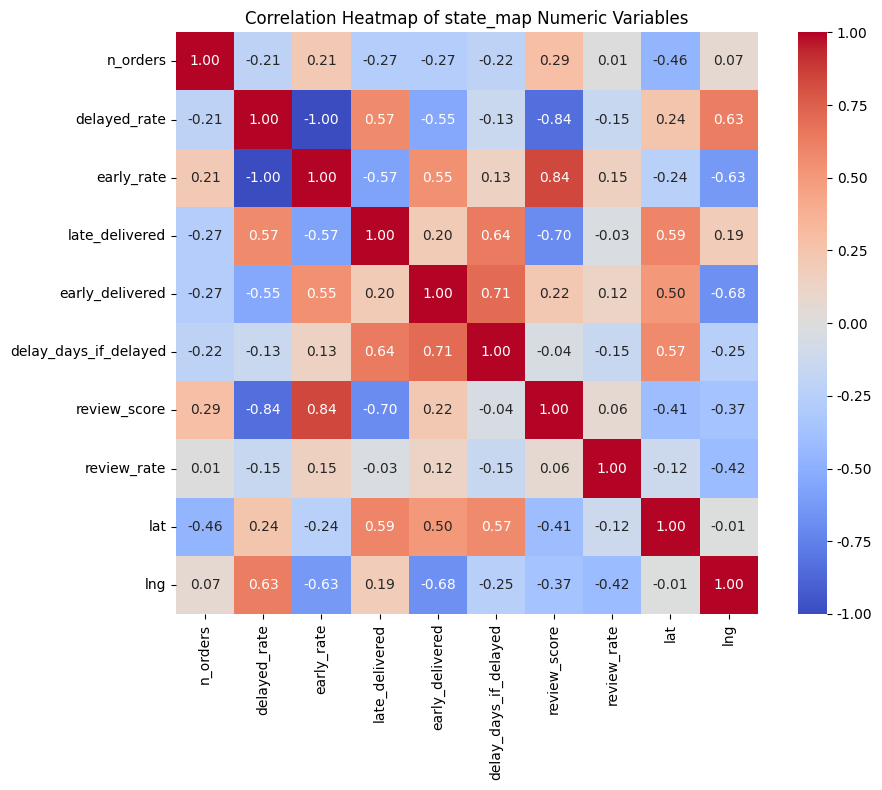

In [ ]:
# 1. 수치형 변수만 선택
num_cols = state_map.select_dtypes(include='number')

# 2. 상관계수 계산
corr = num_cols.corr()

# 3. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # 상관계수 숫자 표시
    fmt=".2f",         # 소수 둘째자리까지
    cmap='coolwarm',   # 색상 맵 (원하면 다른 걸로 바꿔도 됨)
    vmin=-1, vmax=1,   # 색상 범위 고정
    square=True
)
plt.title("Correlation Heatmap of state_map Numeric Variables")
plt.tight_layout()
plt.show()

/tmp/ipython-input-865133071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


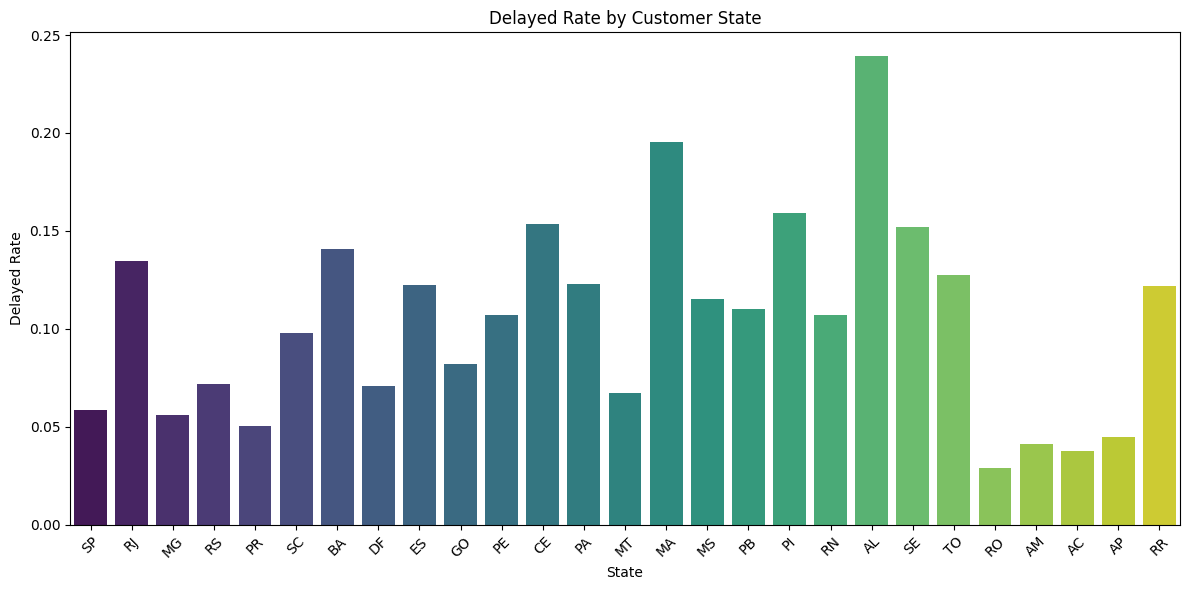

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=state_map,
    x='customer_state',
    y='delayed_rate',
    palette='viridis'
)

plt.title('Delayed Rate by Customer State')
plt.xlabel('State')
plt.ylabel('Delayed Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


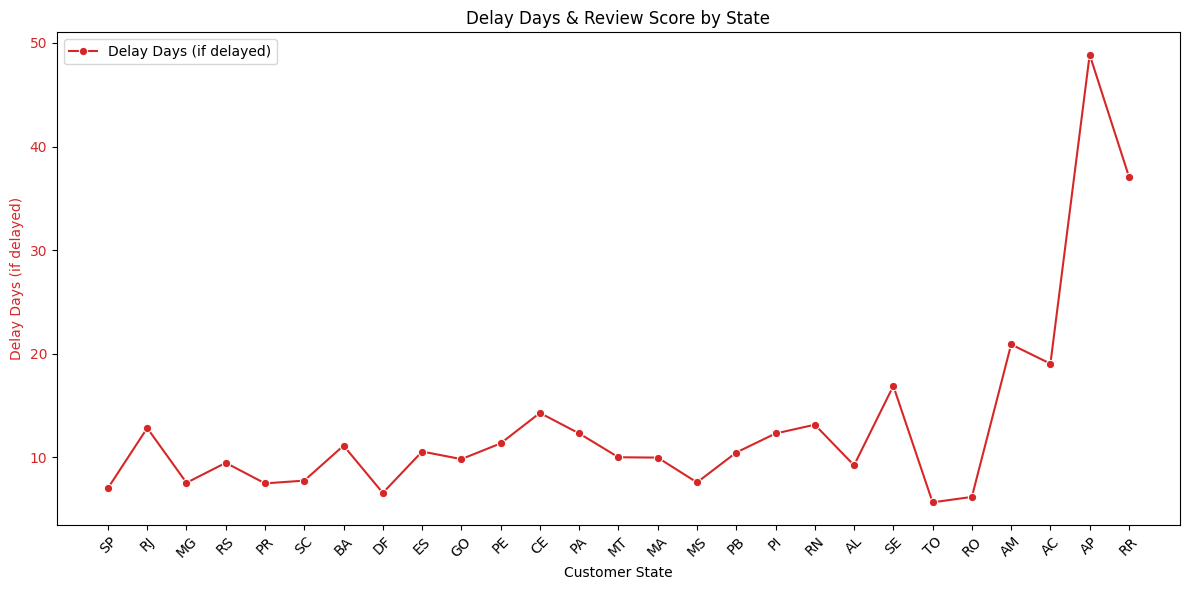

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12,6))

# 첫 번째 y축: delay_days_if_delayed
sns.lineplot(
    data=state_map,
    x='customer_state',
    y='delay_days_if_delayed',
    marker='o',
    ax=ax1,
    label='Delay Days (if delayed)',
    color='tab:red'
)
ax1.set_ylabel('Delay Days (if delayed)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# 두 번째 y축
# ax2 = ax1.twinx()
# sns.lineplot(
#     data=state_map,
#     x='customer_state',
#     y='n_orders',
#     marker='s',
#     ax=ax2,
#     label='n_orders',
#     color='tab:blue'
# )
# ax2.set_ylabel('Orders_count', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# 제목/레이블
plt.title('Delay Days & Review Score by State')
ax1.set_xlabel('Customer State')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
world =gp.read_file('/content/drive/MyDrive/새싹프로젝트1/geo/ne_110m_admin_0_countries.shp')
brazil = world[world['ADMIN'] == 'Brazil'].to_crs('EPSG:4326')

In [ ]:
gdf_pts = gp.GeoDataFrame(
    state_map,
    geometry=gp.points_from_xy(state_map['lng'], state_map['lat']),
    crs='EPSG:4326'
)


## (2) 남동부 북서부 지역 시계열 분석

### 남동부 북서부 지역 분리

In [ ]:
# 1) region map (네가 원하는대로 PA, MT를 'NW'로 포함)
region = {
    # Southeast (남동부) - 편의상 SE로 표기
    "SE": ["RS","SC","PR","SP","RJ","ES","BA","SE","AL","PB","RN","CE","PI","PE", "MA","TO","GO","MG","MS","DF"],

    # Northwest (북서부) - 네 기준: PA, MT 포함
    "NW": ["AC", "AM", "RR", "AP", "PA", "MT", "RO"]
}

# 2) state -> region 역매핑 (코드가 깔끔해짐)
state_to_region = {st: region for region, states in region.items() for st in states}

# 3) state_map에 region 컬럼 추가
state_map["region"] = state_map["customer_state"].map(state_to_region)

# 4) 딕셔너리에 없는 주는 'OTHER' 처리 (원하면 NaN 유지도 가능)
state_map["region"] = state_map["region"].fillna("OTHER")

state_map

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
0,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399,SP,-23.155308,-47.084074,SE
1,RJ,12353,0.134750,0.865250,1.728173,12.779863,12.825028,3.962716,0.988811,RJ,-22.743477,-43.155540,SE
2,MG,11355,0.056110,0.943890,0.423144,12.975527,7.541345,4.192602,0.993960,MG,-19.864647,-44.421615,SE
3,RS,5344,0.071734,0.928266,0.679187,13.883848,9.468147,4.185344,0.996655,RS,-29.679191,-52.032652,SE
4,PR,4923,0.050182,0.949818,0.375475,12.983681,7.482245,4.238260,0.995346,PR,-24.793607,-50.879662,SE
5,SC,3547,0.097725,0.902275,0.757406,11.546557,7.750348,4.130164,0.992418,SC,-27.222486,-49.617937,SE
6,BA,3256,0.140849,0.859151,1.567111,11.656749,11.126151,3.929452,0.991751,BA,-13.049361,-39.560649,SE
7,DF,2080,0.070986,0.929014,0.465826,11.780532,6.562205,4.131642,0.995236,DF,-15.810885,-47.969630,SE
8,ES,1995,0.122255,0.877745,1.290590,11.091261,10.556503,4.082406,0.987026,ES,-20.105145,-40.503183,SE
9,GO,1957,0.082067,0.917933,0.806251,12.305651,9.824318,4.102904,0.994428,GO,-16.577645,-49.334195,SE


In [ ]:
# SE/NW만
df = state_map[state_map['region'].isin(['SE', 'NW'])].copy()
df[['delayed_rate', 'review_score', 'n_orders']] = df[['delayed_rate', 'review_score', 'n_orders']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['delayed_rate', 'review_score', 'n_orders'])

In [ ]:
orders = orders.merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

orders['region'] = orders['customer_state'].map(state_to_region)
orders = orders[orders['region'].isin(['SE', 'NW'])]

In [ ]:
# order 테이블에 월 단위 데이터 추가
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['year_month'].head()

,year_month
0,2017-10
1,2018-07
2,2018-08
3,2017-11
4,2018-02


In [ ]:
# 3일 임계점 기준으로 해당하는 컬럼 집꼐
orders['delay_over_3'] = orders['delivery_delay_days'] > 3
orders['delay_over_3'].head()

,delay_over_3
0,False
1,False
2,False
3,False
4,False


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,SP,SE,2017-10,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,BA,SE,2018-07,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,GO,SE,2018-08,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,RN,SE,2017-11,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,SP,SE,2018-02,False


In [ ]:
# NW/SE 지역별 주문수 및 임계점 기준 지연율
monthly = (
    orders
    .groupby(['region', 'year_month'])
    .agg(
        n_orders=('order_id', 'count'),
        delay_over_3_rate=('delay_over_3', 'mean')
    )
    .reset_index()
)

monthly['year_month'] = monthly['year_month'].dt.to_timestamp()
monthly.head()

,region,year_month,n_orders,delay_over_3_rate
0,NW,2016-09-01,1,0.000
1,NW,2016-10-01,8,0.000
2,NW,2017-01-01,28,0.000
3,NW,2017-02-01,68,0.000
4,NW,2017-03-01,80,0.125


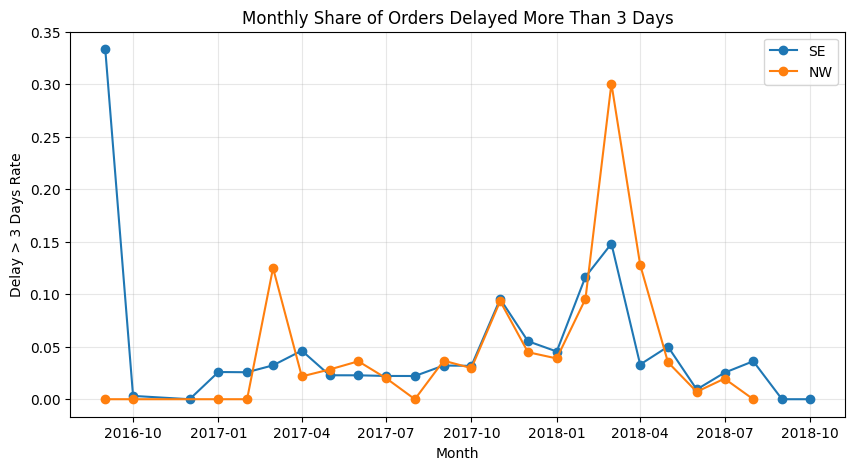

In [ ]:
# 임계치에 해당하는 region 계절성 분석
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for r in ['SE', 'NW']:
    sub = monthly[monthly['region'] == r]
    plt.plot(
        sub['year_month'],
        sub['delay_over_3_rate'],
        marker='o',
        label=r
    )

plt.title('Monthly Share of Orders Delayed More Than 3 Days')
plt.xlabel('Month')
plt.ylabel('Delay > 3 Days Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


> 시각화에 대한 해석
- NW
  - `2018 - 01 ~ 2018 - 03` : 30 %의 배송 딜레이
  - 배송이 무너지는 현상이 발생
  - 빈도는 낮지만 터질 때 크게 터짐
- SE
  - 자주 소규모 스파이크가 터지지만 대규모 붕괴는 x

> 히트맵과 관계 해석
- 임계 지연은 상시적 문제가 아니라 특정 시점에 발생하는 구조적 이벤트이며 이벤트가 뭘까?

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,SP,SE,2017-10,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,BA,SE,2018-07,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,GO,SE,2018-08,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,RN,SE,2017-11,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,SP,SE,2018-02,False


In [ ]:
# 임계치에 해당하는 state별 주문수 및 배송지연의 평균
state_monthly = (
    orders
    .groupby(['customer_state', 'year_month'])
    .agg(
        n_orders=('order_id', 'count'),
        delay_over_3_rate=('delay_over_3', 'mean')
    )
    .reset_index()
)

state_monthly['year_month'] = state_monthly['year_month'].dt.to_timestamp()
state_monthly.head()

,customer_state,year_month,n_orders,delay_over_3_rate
0,AC,2017-01-01,2,0.0
1,AC,2017-02-01,3,0.0
2,AC,2017-03-01,2,0.0
3,AC,2017-04-01,5,0.0
4,AC,2017-05-01,8,0.0


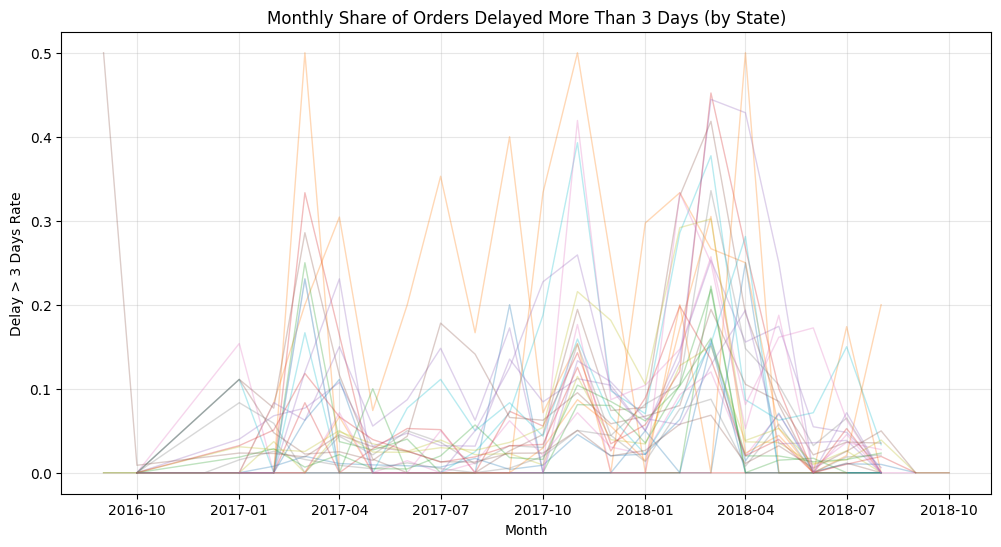

In [ ]:


plt.figure(figsize=(12,6))

for st in state_monthly['customer_state'].unique():
    sub = state_monthly[state_monthly['customer_state'] == st]
    plt.plot(
        sub['year_month'],
        sub['delay_over_3_rate'],
        alpha=0.3,
        linewidth=1
    )

plt.title('Monthly Share of Orders Delayed More Than 3 Days (by State)')
plt.xlabel('Month')
plt.ylabel('Delay > 3 Days Rate')

plt.grid(alpha=0.3)
plt.show()


In [ ]:
top_states = (
    state_monthly
    .groupby('customer_state')['delay_over_3_rate']
    .max()
    .sort_values(ascending=False)
    .head(6)
    .index
)

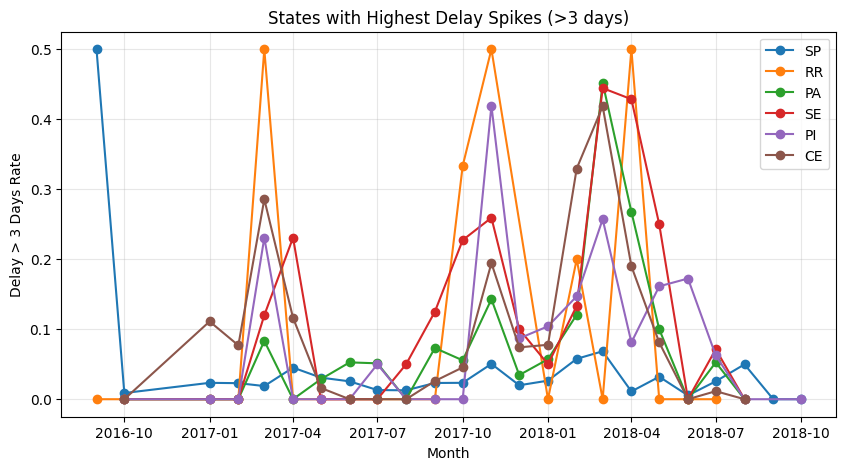

In [ ]:
plt.figure(figsize=(10,5))

for st in top_states:
    sub = state_monthly[state_monthly['customer_state'] == st]
    plt.plot(
        sub['year_month'],
        sub['delay_over_3_rate'],
        marker='o',
        label=st
    )

plt.title('States with Highest Delay Spikes (>3 days)')
plt.xlabel('Month')
plt.ylabel('Delay > 3 Days Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# [4] 대표 주 뽑기

In [ ]:
state_map.head()

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
0,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399,SP,-23.155308,-47.084074,SE
1,RJ,12353,0.134750,0.865250,1.728173,12.779863,12.825028,3.962716,0.988811,RJ,-22.743477,-43.155540,SE
2,MG,11355,0.056110,0.943890,0.423144,12.975527,7.541345,4.192602,0.993960,MG,-19.864647,-44.421615,SE
3,RS,5344,0.071734,0.928266,0.679187,13.883848,9.468147,4.185344,0.996655,RS,-29.679191,-52.032652,SE
4,PR,4923,0.050182,0.949818,0.375475,12.983681,7.482245,4.238260,0.995346,PR,-24.793607,-50.879662,SE


In [ ]:
se = state_map[state_map['region'] == 'SE']
nw = state_map[state_map['region'] == 'NW']

In [ ]:
se_rep = (
    se.sort_values(
        by=['n_orders', 'delayed_rate'],
        ascending=[False, False]
    )
    .head(1)
)
se_rep

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
0,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399,SP,-23.155308,-47.084074,SE


In [ ]:
nw_rep = (nw.sort_values(
        by=['n_orders', 'delayed_rate'],
        ascending=[False, False]
    )
    .head(1)
)
nw_rep

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
12,PA,946,0.122899,0.877101,1.512088,14.885806,12.303485,3.912673,0.986345,PA,-2.631213,-49.485862,NW


In [ ]:
state_map.sort_values(by=['region', 'n_orders', 'delayed_rate'], ascending=[False, False, False]) # MA, MT

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
0,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399,SP,-23.155308,-47.084074,SE
1,RJ,12353,0.134750,0.865250,1.728173,12.779863,12.825028,3.962716,0.988811,RJ,-22.743477,-43.155540,SE
2,MG,11355,0.056110,0.943890,0.423144,12.975527,7.541345,4.192602,0.993960,MG,-19.864647,-44.421615,SE
3,RS,5344,0.071734,0.928266,0.679187,13.883848,9.468147,4.185344,0.996655,RS,-29.679191,-52.032652,SE
4,PR,4923,0.050182,0.949818,0.375475,12.983681,7.482245,4.238260,0.995346,PR,-24.793607,-50.879662,SE
5,SC,3547,0.097725,0.902275,0.757406,11.546557,7.750348,4.130164,0.992418,SC,-27.222486,-49.617937,SE
6,BA,3256,0.140849,0.859151,1.567111,11.656749,11.126151,3.929452,0.991751,BA,-13.049361,-39.560649,SE
7,DF,2080,0.070986,0.929014,0.465826,11.780532,6.562205,4.131642,0.995236,DF,-15.810885,-47.969630,SE
8,ES,1995,0.122255,0.877745,1.290590,11.091261,10.556503,4.082406,0.987026,ES,-20.105145,-40.503183,SE
9,GO,1957,0.082067,0.917933,0.806251,12.305651,9.824318,4.102904,0.994428,GO,-16.577645,-49.334195,SE


In [ ]:


def pick_rep(df, q=0.7):
    # region 내부에서 주문수 상위 q 이상만 남김 (안정성 확보)
    th = df['n_orders'].quantile(q)
    cand = df[df['n_orders'] >= th].copy()

    # 대표 선정: 주문수↓? 아니고 주문수, 지연율 모두 높은 1개
    rep = cand.sort_values(['n_orders','delayed_rate'], ascending=[False, False]).head(1)
    return rep

kpi_table = (
    state_map
    .groupby('region', group_keys=False)
    .apply(pick_rep, q=0.5)
    .reset_index(drop=True)
)

kpi_table

/tmp/ipython-input-1182600156.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pick_rep, q=0.5)


,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
0,PA,946,0.122899,0.877101,1.512088,14.885806,12.303485,3.912673,0.986345,PA,-2.631213,-49.485862,NW
1,SP,40495,0.058787,0.941213,0.412847,10.801592,7.022704,4.246183,0.994399,SP,-23.155308,-47.084074,SE


In [ ]:
target_states = ['MA', 'MT']

kpi = (
    state_map[state_map['customer_state'].isin(target_states)]
    .reset_index(drop=True)
)

kpi

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region
0,MT,886,0.067492,0.932508,0.675241,14.393228,10.004817,4.147392,0.992126,MT,-14.156482,-55.708956,NW
1,MA,717,0.195562,0.804438,1.949889,10.909046,9.970709,3.839385,0.993065,MA,-3.798997,-44.818627,SE


## 두 주의 비교 분석 + 시각화

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,SP,SE,2017-10,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,BA,SE,2018-07,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,GO,SE,2018-08,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,RN,SE,2017-11,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,SP,SE,2018-02,False


In [ ]:
delivery_days_by_state = (
    orders.loc[orders['customer_state'].isin(['MT', 'MA'])]
          .groupby('customer_state', as_index=False)['delivery_days']
          .mean()
)

In [ ]:
kpi = kpi.merge(
    delivery_days_by_state,
    on='customer_state',
    how='left'
)

In [ ]:
kpi.rename({'delivery_days_x': 'delivery_days'},axis=1, inplace=True)
kpi

,customer_state,n_orders,delayed_rate,early_rate,late_delivered,early_delivered,delay_days_if_delayed,review_score,review_rate,geolocation_state,lat,lng,region,delivery_days
0,MT,886,0.067492,0.932508,0.675241,14.393228,10.004817,4.147392,0.992126,MT,-14.156482,-55.708956,NW,18.055756
1,MA,717,0.195562,0.804438,1.949889,10.909046,9.970709,3.839385,0.993065,MA,-3.798997,-44.818627,SE,21.572976


### (1) 배송지연의 변인들 비교 시각화

In [ ]:
from matplotlib import font_manager, rc
from matplotlib.patches import Patch

available_fonts = [f.name for f in font_manager.fontManager.ttflist]

# 한글 폰트 후보 우선순위
for font_name in ['Malgun Gothic', 'AppleGothic', 'NanumGothic']:
    if font_name in available_fonts:
        rc('font', family=font_name)
        break

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
state_colors = {
    'MA': 'tab:blue',     # 남동부
    'MT': 'lightgray'     # 북서부
}

state_labels = {
    'MA': 'MA(남동부)',
    'MT': 'MT(북서부)'
}

In [ ]:
# 범례용 핸들 (4개 그래프에서 공통 사용)
legend_elements = [
    Patch(facecolor=state_colors['MA'], label=state_labels['MA']),
    Patch(facecolor=state_colors['MT'], label=state_labels['MT'])
]

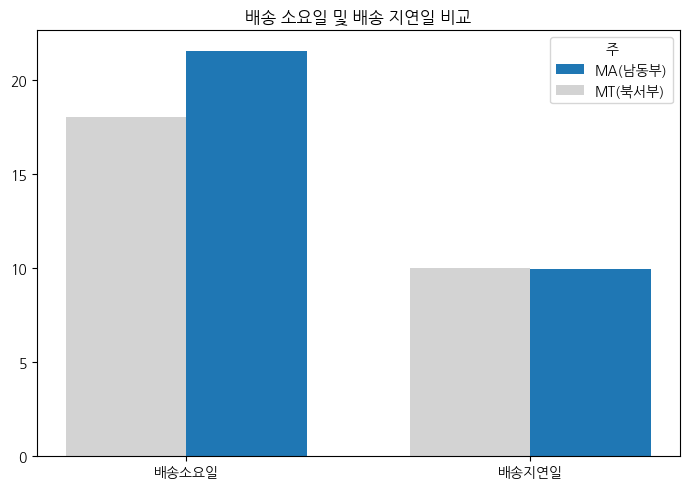

In [ ]:
metrics = ['delivery_days', 'delay_days_if_delayed']
labels = ['배송소요일', '배송지연일']

fig, ax = plt.subplots(figsize=(7, 5))
width = 0.35
x = range(len(metrics))

for i, row in enumerate(kpi.itertuples()):
    state = row.customer_state
    values = [getattr(row, m) for m in metrics]

    # MA는 파란색, MT는 회색으로 통일
    color = state_colors[state]

    ax.bar(
        [p + i * width for p in x],
        values,
        width=width,
        color=color
    )

ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.set_title('배송 소요일 및 배송 지연일 비교')

# 공통 범례 적용
ax.legend(handles=legend_elements, title='주', loc='best')

plt.tight_layout()
plt.show()

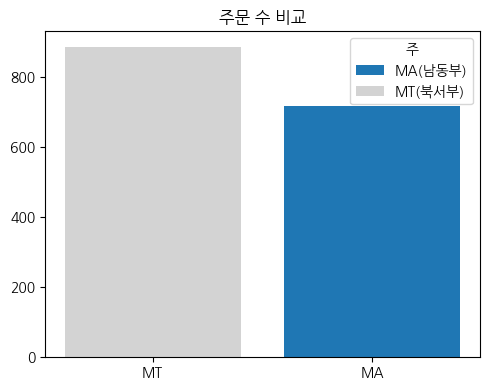

In [ ]:
# ---------- 2. 주문 수 비교 ----------
values = kpi['n_orders']
colors = kpi['customer_state'].map(state_colors)

plt.figure(figsize=(5, 4))
plt.bar(kpi['customer_state'], values, color=colors)
plt.title('주문 수 비교')

plt.legend(handles=legend_elements, title='주', loc='best')
plt.tight_layout()
plt.show()

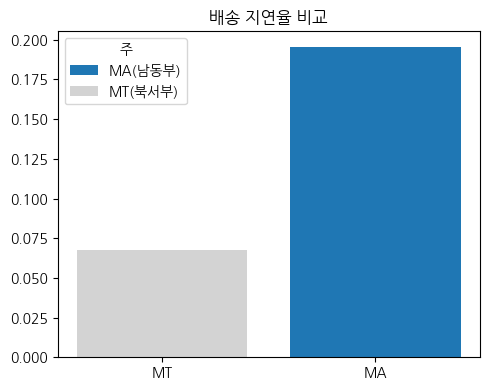

In [ ]:
# ---------- 3. 배송 지연율 비교 ----------
values = kpi['delayed_rate']
colors = kpi['customer_state'].map(state_colors)

plt.figure(figsize=(5, 4))
plt.bar(kpi['customer_state'], values, color=colors)
plt.title('배송 지연율 비교')

plt.legend(handles=legend_elements, title='주', loc='best')
plt.tight_layout()
plt.show()

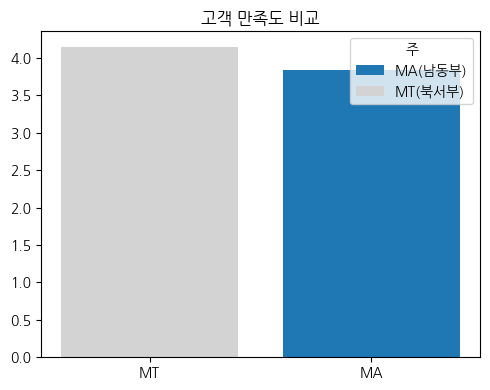

In [ ]:
# ---------- 4. 고객 만족도(리뷰 스코어) 비교 ----------
values = kpi['review_score']
colors = kpi['customer_state'].map(state_colors)

plt.figure(figsize=(5, 4))
plt.bar(kpi['customer_state'], values, color=colors)
plt.title('고객 만족도 비교')

plt.legend(handles=legend_elements, title='주', loc='best')
plt.tight_layout()
plt.show()

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,SP,SE,2017-10,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,BA,SE,2018-07,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,GO,SE,2018-08,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,RN,SE,2017-11,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,SP,SE,2018-02,False


In [ ]:
monthly_delay_over_3_mm = (
    orders.loc[orders['customer_state'].isin(['MA', 'MT'])]
    .groupby(['year_month', 'customer_state'], as_index=False)
    .agg(
        n_orders=('customer_id', 'count'),
        n_delay_over_3=('delay_over_3', 'sum')
    )
)

monthly_delay_over_3_mm['delay_over_3_rate'] = (
    monthly_delay_over_3_mm['n_delay_over_3'] / monthly_delay_over_3_mm['n_orders']
)

monthly_delay_over_3_mm.head()


,year_month,customer_state,n_orders,n_delay_over_3,delay_over_3_rate
0,2016-10,MA,4,0,0.000000
1,2016-10,MT,3,0,0.000000
2,2017-01,MA,9,1,0.111111
3,2017-01,MT,11,0,0.000000
4,2017-02,MA,11,0,0.000000


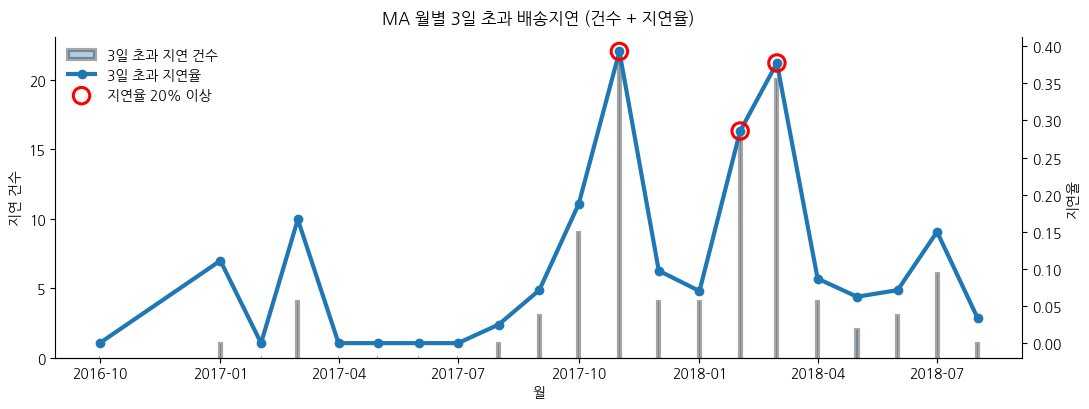

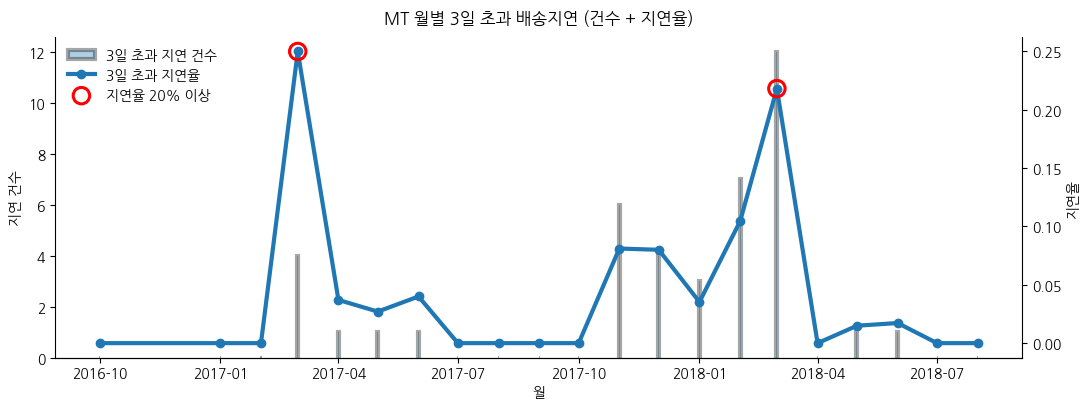

In [ ]:
plot_df = monthly_delay_over_3_mm.copy()
dtype_str = str(plot_df['year_month'].dtype).lower()

if 'period' in dtype_str:
    plot_df['year_month'] = plot_df['year_month'].dt.to_timestamp()
elif plot_df['year_month'].dtype == 'object':
    plot_df['year_month'] = pd.to_datetime(plot_df['year_month'] + '-01')
else:
    plot_df['year_month'] = pd.to_datetime(plot_df['year_month'])

plot_df = plot_df.sort_values(['customer_state', 'year_month'])

# ✅ 빨간 동그라미 기준 (지연건수 10건 이상)
rate_threshold = 0.2

for state in ['MA', 'MT']:
    df_s = plot_df[plot_df['customer_state'] == state].sort_values('year_month')

    fig, ax1 = plt.subplots(figsize=(11, 4.2))
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')

    # ✅ 격자 제거
    ax1.grid(False)

    # ✅ 막대(건수): 반투명 + 테두리
    ax1.bar(
        df_s['year_month'],
        df_s['n_delay_over_3'],
        alpha=0.35,
        edgecolor='black',
        linewidth=3,   # <- 5는 너무 두꺼워서 시각적으로 부담됨 (원하면 다시 5로)
        zorder=2,
        label='3일 초과 지연 건수'
    )
    ax1.set_ylabel('지연 건수')

    # ✅ 라인(지연율)
    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.plot(
        df_s['year_month'],
        df_s['delay_over_3_rate'],
        marker='o',
        linewidth=3,
        zorder=3,
        label='3일 초과 지연율'
    )
    ax2.set_ylabel('지연율')

    # ✅ [추가] 지연건수 10건 이상인 달의 "라인 점"에 빨간 동그라미
    highlight_df = df_s[df_s['delay_over_3_rate'] >= rate_threshold]

    ax2.scatter(
    highlight_df['year_month'],
    highlight_df['delay_over_3_rate'],
    s=140,
    facecolors='none',
    edgecolors='red',
    linewidths=2.2,
    zorder=4,
    label=f'지연율 {int(rate_threshold*100)}% 이상'
)

    # ✅ 스파인 정리
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # ✅ 타이틀/여백
    ax1.set_title(f'{state} 월별 3일 초과 배송지연 (건수 + 지연율)', pad=10)
    ax1.set_xlabel('월')

    # ✅ 범례 합치기 + 프레임 제거
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc='upper left', frameon=False)

    plt.tight_layout()
    plt.show()

> MA (Maranhão)의 패턴

- 지연율 피크가 여러 번 반복적으로 발생

2017-10, 2018-02 ~ 2018-03

지연 건수도 함께 증가

지연율이 0.3~0.4 수준까지 급등

=>“물량이 늘어날수록 배송 시스템이 감당을 못 하는 구조”

> MT (Mato Grosso)의 패턴

- 지연율 피크가 소수의 특정 시점에만 발생

2017-03, 2018-03

특징: 지연 건수는 MA 대비 크지 않음

그럼에도 지연율이 0.2 이상 급등

=>“물량 때문이라기보다는, 특정 시점의 외생적 리스크에 취약”

`같은 ‘지연율 상승’이지만 성격이 다르다`

- MA형 지연 (구조적 문제)

건수 ↑ + 지연율 ↑ 가 동시에 반복

해석: 물류 인프라 처리 용량 한계, 허브/라스트마일 병목

=> 지연이 지속적인 '상태'로서 발생



- MT형 지연 (이벤트성 문제)

건수는 적은데 지연율만 급등

해석:도로/기후/거리 등 외부 요인, 특정 시즌(우기, 연말) 민감 , 변동성이 매우큼

=> 지연이 특정 외생변수(통제하기 어려운)

### => 배송지연에 대한 어떤 정책을 정해야 할까?

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,SP,SE,2017-10,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,BA,SE,2018-07,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,GO,SE,2018-08,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,RN,SE,2017-11,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,SP,SE,2018-02,False


### (2) 구간별 퍼널 분석

In [ ]:
datetime_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

In [ ]:
for col in datetime_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

In [ ]:
funnel_df = (
    orders
    .loc[orders['customer_state'].isin(['MA', 'MT'])]
    .copy()
)
funnel_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
75,a910f58086d58b3ae6f37aa712d377b9,afb19a4b667cb708caab312757ec3d3f,delivered,2017-09-15 09:19:48,2017-09-15 09:35:18,2017-09-18 18:20:00,2017-09-25 20:14:48,2017-10-11,10.454861,-15.156389,MT,NW,2017-09,False
150,86b37610c0e86e94afe3d5ba4b73fa14,86ff82570097f39b2193254f540e4a69,delivered,2017-11-17 21:14:42,2017-11-22 02:49:29,2017-11-22 17:37:09,2017-12-05 20:23:33,2017-12-20,17.964479,-14.150313,MT,NW,2017-11,False
178,ee990334acb0ff9333b01afa465f3006,a8331c35b57d8fe09e8df1c06509de29,delivered,2018-02-28 17:00:28,2018-03-02 02:10:55,2018-03-02 22:18:35,2018-03-22 10:18:36,2018-04-02,21.720926,-10.570417,MT,NW,2018-02,False
183,64a2b20e6611bf80d933549f4c45ad84,de62761e79f4ae4169cab45ed5f36026,delivered,2017-12-20 12:30:40,2017-12-21 02:11:52,2017-12-22 20:41:54,2018-01-09 15:44:20,2018-01-19,20.134491,-9.344213,MT,NW,2017-12,False
386,72ee4a26e767e55282ac10e63c7b1227,ab4e4f11610404b4184fb812e47bb0ed,delivered,2018-06-23 19:24:21,2018-06-23 19:39:10,2018-06-25 13:48:00,2018-07-09 18:21:32,2018-07-24,15.956377,-14.235046,MA,SE,2018-06,False


In [ ]:
# 결제 승인 시점 - 고객이 주문한 시점
funnel_df['t_purchase_to_approve'] = (
    funnel_df['order_approved_at'] - funnel_df['order_purchase_timestamp']
).dt.days

# 판매자가 물류사에 인계한 시점 - 결제 승인 시점
funnel_df['t_approve_to_carrier'] = (
    funnel_df['order_delivered_carrier_date'] - funnel_df['order_approved_at']
).dt.days

# 고객에게 실제 배송 완료 시점 - 판매자가 물류사에 인계한 시점
funnel_df['t_carrier_to_customer'] = (
    funnel_df['order_delivered_customer_date'] - funnel_df['order_delivered_carrier_date']
).dt.days

# 고객에게 실제 배송 완료 시점 - 고객이 주문한 시점
funnel_df['t_total_delivery'] = (
    funnel_df['order_delivered_customer_date'] - funnel_df['order_purchase_timestamp']
).dt.days

# 고객에게 실제 배송 완료 시점 - 최초 예상 배송 완료
funnel_df['t_delay_vs_estimated'] = (
    funnel_df['order_delivered_customer_date'] - funnel_df['order_estimated_delivery_date']
).dt.days

funnel_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3,t_purchase_to_approve,t_approve_to_carrier,t_carrier_to_customer,t_total_delivery,t_delay_vs_estimated
75,a910f58086d58b3ae6f37aa712d377b9,afb19a4b667cb708caab312757ec3d3f,delivered,2017-09-15 09:19:48,2017-09-15 09:35:18,2017-09-18 18:20:00,2017-09-25 20:14:48,2017-10-11,10.454861,-15.156389,MT,NW,2017-09,False,0.0,3.0,7.0,10.0,-16.0
150,86b37610c0e86e94afe3d5ba4b73fa14,86ff82570097f39b2193254f540e4a69,delivered,2017-11-17 21:14:42,2017-11-22 02:49:29,2017-11-22 17:37:09,2017-12-05 20:23:33,2017-12-20,17.964479,-14.150313,MT,NW,2017-11,False,4.0,0.0,13.0,17.0,-15.0
178,ee990334acb0ff9333b01afa465f3006,a8331c35b57d8fe09e8df1c06509de29,delivered,2018-02-28 17:00:28,2018-03-02 02:10:55,2018-03-02 22:18:35,2018-03-22 10:18:36,2018-04-02,21.720926,-10.570417,MT,NW,2018-02,False,1.0,0.0,19.0,21.0,-11.0
183,64a2b20e6611bf80d933549f4c45ad84,de62761e79f4ae4169cab45ed5f36026,delivered,2017-12-20 12:30:40,2017-12-21 02:11:52,2017-12-22 20:41:54,2018-01-09 15:44:20,2018-01-19,20.134491,-9.344213,MT,NW,2017-12,False,0.0,1.0,17.0,20.0,-10.0
386,72ee4a26e767e55282ac10e63c7b1227,ab4e4f11610404b4184fb812e47bb0ed,delivered,2018-06-23 19:24:21,2018-06-23 19:39:10,2018-06-25 13:48:00,2018-07-09 18:21:32,2018-07-24,15.956377,-14.235046,MA,SE,2018-06,False,0.0,1.0,14.0,15.0,-15.0


In [ ]:
funnel_df['year_month'] = funnel_df['order_purchase_timestamp'].dt.to_period('M')

monthly_funnel = (
    funnel_df
    .groupby(['year_month', 'customer_state'])
    .agg(
        avg_purchase_to_approve=('t_purchase_to_approve', 'mean'),
        avg_approve_to_carrier=('t_approve_to_carrier', 'mean'),
        avg_carrier_to_customer=('t_carrier_to_customer', 'mean'),
        avg_total_delivery=('t_total_delivery', 'mean'),
        avg_delay_vs_estimated=('t_delay_vs_estimated', 'mean'),
        n_orders=('order_id', 'count')
    )
    .reset_index()
)
monthly_funnel.head()

,year_month,customer_state,avg_purchase_to_approve,avg_approve_to_carrier,avg_carrier_to_customer,avg_total_delivery,avg_delay_vs_estimated,n_orders
0,2016-10,MA,0.250000,14.000000,13.250000,28.000000,-37.250000,4
1,2016-10,MT,0.333333,21.000000,3.000000,7.000000,-56.000000,3
2,2017-01,MA,0.222222,12.428571,12.166667,24.166667,-27.166667,9
3,2017-01,MT,0.272727,1.090909,13.111111,15.333333,-26.333333,11
4,2017-02,MA,0.300000,1.600000,11.909091,15.000000,-34.272727,11


In [ ]:
bottleneck_summary = (
    monthly_funnel
    .groupby('customer_state')
    .agg(
        std_approve_to_carrier=('avg_approve_to_carrier', 'std'),
        std_carrier_to_customer=('avg_carrier_to_customer', 'std'),
        mean_approve_to_carrier=('avg_approve_to_carrier', 'mean'),
        mean_carrier_to_customer=('avg_carrier_to_customer', 'mean')
    )
)

In [ ]:
mf = monthly_funnel.copy()

# year_month: Period / str / datetime 모두 대응 -> datetime으로 통일
dtype_str = str(mf['year_month'].dtype).lower()
if 'period' in dtype_str:
    mf['year_month_dt'] = mf['year_month'].dt.to_timestamp()
elif mf['year_month'].dtype == 'object':
    mf['year_month_dt'] = pd.to_datetime(mf['year_month'].astype(str) + '-01')
else:
    mf['year_month_dt'] = pd.to_datetime(mf['year_month'])

mf = mf.sort_values(['customer_state', 'year_month_dt'])

# 단계 컬럼
stage_cols = [
    'avg_purchase_to_approve',
    'avg_approve_to_carrier',
    'avg_carrier_to_customer',
]

# ✅ 한글 명칭(이동 과정이 보이게)
stage_labels_kr = {
    'avg_purchase_to_approve': '주문 → 결제 승인',
    'avg_approve_to_carrier': '결제 승인 → 출고',
    'avg_carrier_to_customer': '출고 → 고객 배송 완료',
}

# 2/3/4번 색상(요구사항)
# carrier_to_customer = 파랑, approve_to_carrier = 빨강, purchase_to_approve = 회색
stage_colors = {
    'avg_purchase_to_approve': 'gray',
    'avg_approve_to_carrier': 'red',
    'avg_carrier_to_customer': 'tab:blue',
}

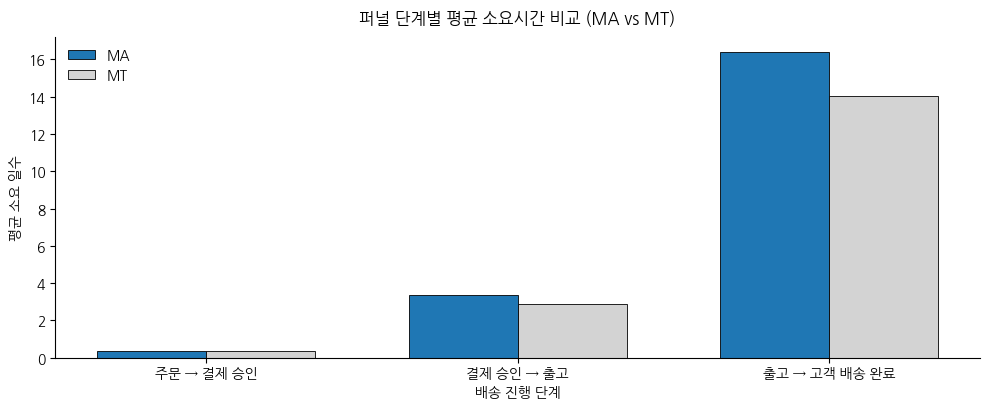

In [ ]:
bar_base = (
    mf.groupby('customer_state')[stage_cols]
      .mean()
)

# 보기 좋게 순서 고정(존재하는 것만)
states = [s for s in ['MA', 'MT'] if s in bar_base.index]
if not states:
    states = list(bar_base.index)

x = range(len(stage_cols))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 4.2))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.grid(False)

for i, st in enumerate(states):
    vals = bar_base.loc[st, stage_cols].values

    # stage별로 최대값은 파랑, 나머지는 회색
    colors = []
    for j, col in enumerate(stage_cols):
        max_val = bar_base[col].max()
        colors.append('tab:blue' if vals[j] == max_val else 'lightgray')

    ax.bar(
        [p + i * width for p in x],
        vals,
        width=width,
        color=colors,
        edgecolor='black',
        linewidth=0.6,
        label=st,
        zorder=2
    )

ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels([stage_labels_kr[c] for c in stage_cols])
ax.set_title('퍼널 단계별 평균 소요시간 비교 (MA vs MT)', pad=10)
ax.set_xlabel('배송 진행 단계')
ax.set_ylabel('평균 소요 일수')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()
plt.show()


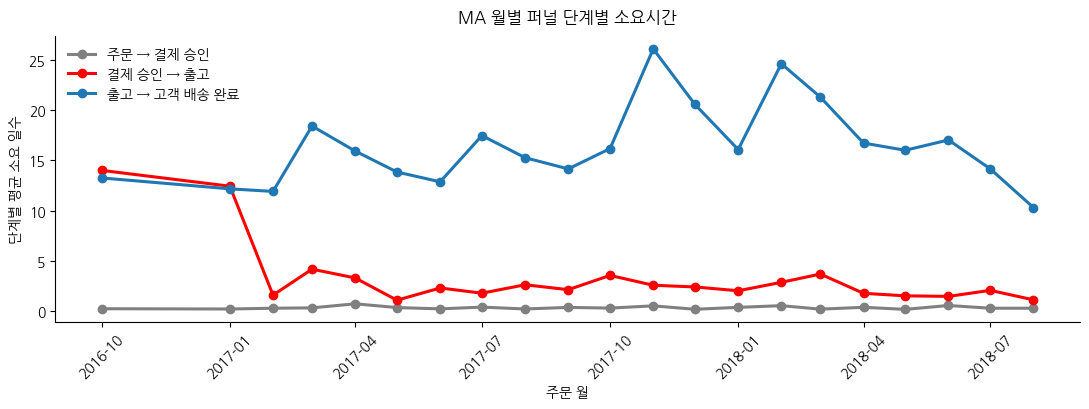

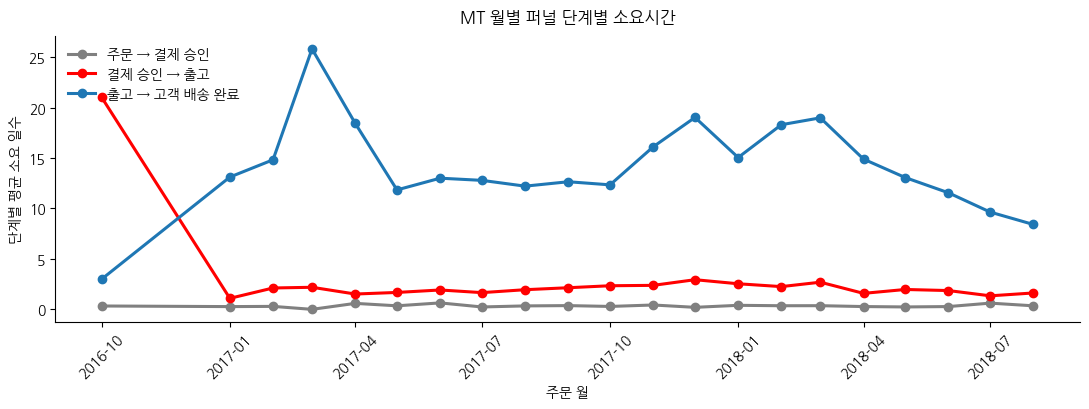

In [ ]:
def plot_lines_for_state(state):
    df_s = mf[mf['customer_state'] == state].sort_values('year_month_dt')
    if df_s.empty:
        return

    fig, ax = plt.subplots(figsize=(11, 4.2))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.grid(False)

    for col in stage_cols:
        ax.plot(
            df_s['year_month_dt'],
            df_s[col],
            marker='o',
            linewidth=2.2,
            color=stage_colors[col],
            label=stage_labels_kr[col],
            zorder=3
        )

    ax.set_title(f'{state} 월별 퍼널 단계별 소요시간', pad=10)
    ax.set_xlabel('주문 월')
    ax.set_ylabel('단계별 평균 소요 일수')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=False, loc='upper left')
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

for st in ['MA', 'MT']:
    plot_lines_for_state(st)

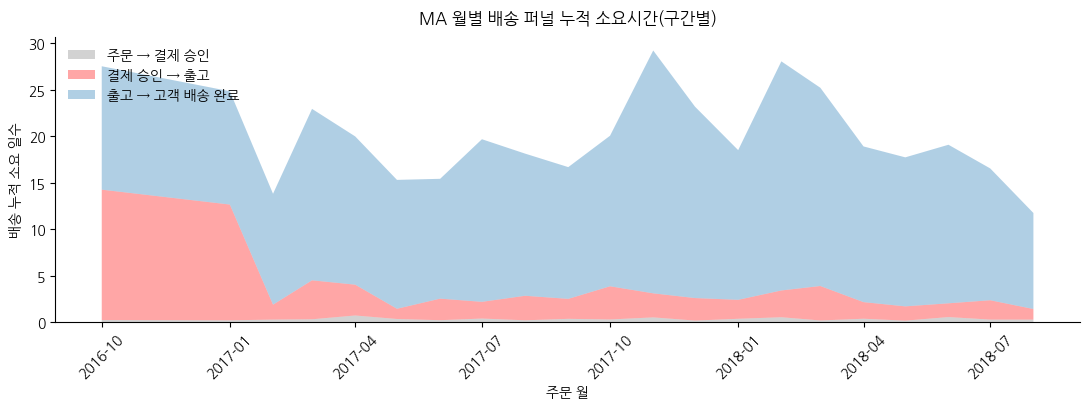

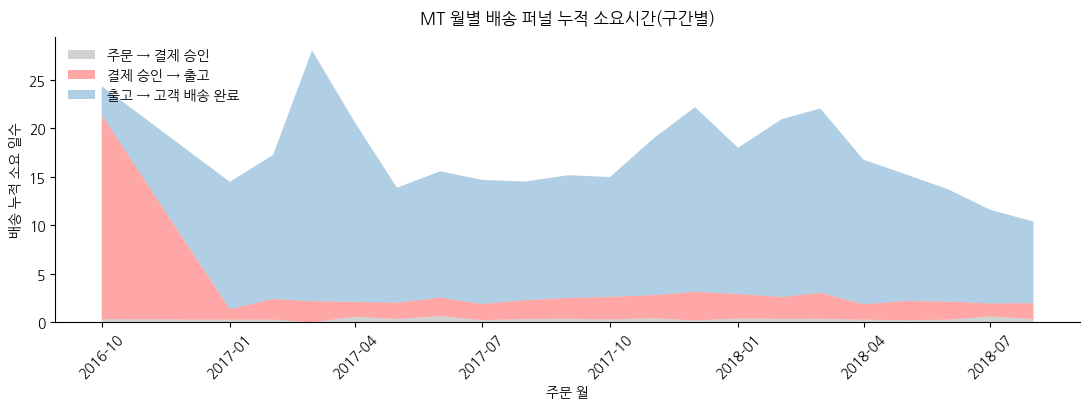

In [ ]:
def plot_stack_for_state(state):
    df_s = mf[mf['customer_state'] == state].sort_values('year_month_dt')
    if df_s.empty:
        return

    x = df_s['year_month_dt']

    fig, ax = plt.subplots(figsize=(11, 4.2))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    ax.grid(False)

    ax.stackplot(
        x,
        df_s['avg_purchase_to_approve'],
        df_s['avg_approve_to_carrier'],
        df_s['avg_carrier_to_customer'],
        labels=[
            stage_labels_kr['avg_purchase_to_approve'],
            stage_labels_kr['avg_approve_to_carrier'],
            stage_labels_kr['avg_carrier_to_customer'],
        ],
        colors=[
            stage_colors['avg_purchase_to_approve'],
            stage_colors['avg_approve_to_carrier'],
            stage_colors['avg_carrier_to_customer'],
        ],
        alpha=0.35
    )

    ax.set_title(f'{state} 월별 배송 퍼널 누적 소요시간(구간별)', pad=10)
    ax.set_xlabel('주문 월')
    ax.set_ylabel('배송 누적 소요 일수')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=False, loc='upper left')
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

for st in ['MA', 'MT']:
    plot_stack_for_state(st)

In [ ]:
week = orders[
    (orders['customer_state'].isin(['MA', 'MT'])) &
    (orders['order_purchase_timestamp'].between('2016-10-01', '2017-07-31'))
].copy()
week

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delivery_delay_days,customer_state,region,year_month,delay_over_3
888,0ae7144116fa718b3bb90cd8d855713a,bb02acc51461fe7e45f7fdf63d18072c,delivered,2017-04-18 16:00:31,2017-04-20 02:55:33,2017-04-20 14:04:00,2017-05-10 07:47:41,2017-05-23,21.657755,-12.675220,MA,SE,2017-04,False
2138,8c9bf4b39dc933aa382d9a6e5b846b9d,2f6a7c83c088882e1cb34f7bb41a30f2,delivered,2017-04-30 12:13:24,2017-04-30 12:25:26,2017-05-04 13:23:23,2017-05-30 15:32:54,2017-06-02,30.138542,-2.352153,MA,SE,2017-04,False
2947,758e852ab6d20c02ec1b0f75a024d83f,7c89a2053c38cf699f55fb5864282447,delivered,2017-05-17 22:16:39,2017-05-18 23:42:35,2017-05-19 16:01:37,2017-06-01 13:15:33,2017-06-19,14.624236,-17.447535,MT,NW,2017-05,False
3049,fb7a31602527aff8e971f4cf8e5ba0b2,932632fb555d55c80b3f88e830abf866,delivered,2017-06-09 10:05:46,2017-06-09 13:35:12,2017-06-12 13:05:12,2017-06-19 19:27:43,2017-07-12,10.390243,-22.189086,MT,NW,2017-06,False
4252,c1c8d1d83b4a995b98278cf1d99d6cfc,87d73ddc7b2bafe58c0c02739d295e5a,delivered,2017-05-13 15:45:59,2017-05-13 15:55:18,2017-05-15 11:36:08,2017-05-26 12:51:36,2017-06-12,12.878900,-16.464167,MT,NW,2017-05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97579,632ec9368030a0679acafa0d23b7be2c,3387330a6000841f3964adba5892e669,delivered,2017-03-18 11:10:54,2017-03-18 11:10:54,2017-03-20 12:12:31,2017-04-11 10:52:28,2017-04-26,23.987199,-14.546898,MA,SE,2017-03,False
98061,403d459dc8e857df1180efcd8dda7a89,a591babcd45655d95cb7eb5902f4d982,delivered,2017-06-30 11:57:46,2017-07-04 03:55:13,2017-07-05 09:56:43,2017-07-13 20:41:52,2017-08-01,13.363958,-18.137593,MT,NW,2017-06,False
98284,94b35c9542f07ad80b3367f9051b63af,ae3a3a6fd9128d8617e2cb3a88a7598b,delivered,2017-01-24 12:38:48,2017-01-25 02:42:34,2017-01-26 16:32:31,2017-02-07 08:42:04,2017-03-31,13.835602,-51.637454,MA,SE,2017-01,False
98742,c52a603ac74efb60aefc2f0e79d3a432,607c5e234f26e35e0e8e32a6eb47670f,delivered,2017-02-02 15:22:02,2017-02-03 03:45:34,2017-02-03 12:34:52,2017-02-10 09:27:44,2017-03-09,7.753958,-26.605741,MT,NW,2017-02,False


In [ ]:
week['year_week'] = week['order_purchase_timestamp'].dt.to_period('W')

weekly_orders = (
    week
    .groupby(['year_week', 'customer_state'])
    .agg(n_orders=('order_id', 'count'))
    .reset_index()
)

weekly_orders['year_week_dt'] = weekly_orders['year_week'].dt.to_timestamp()

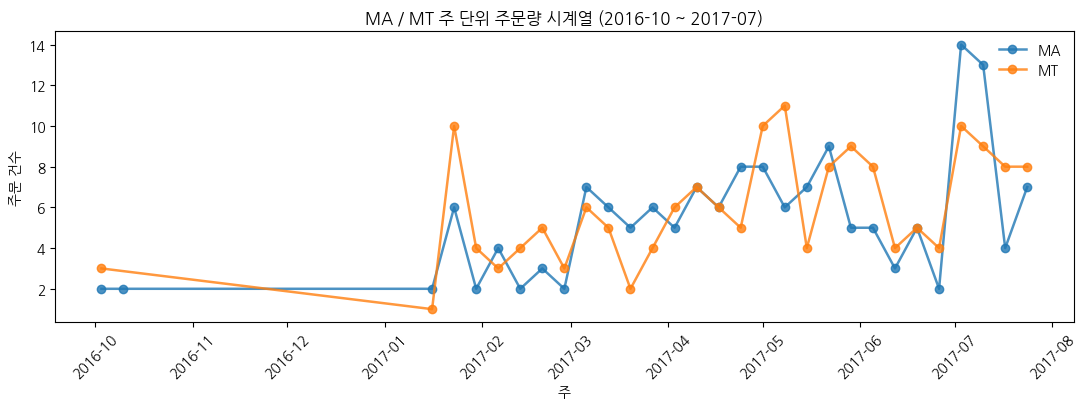

In [ ]:
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(11, 4.2))

for state, color in zip(['MA', 'MT'], ['tab:blue', 'tab:orange']):
    df_s = weekly_orders[weekly_orders['customer_state'] == state]
    plt.plot(
        df_s['year_week_dt'],
        df_s['n_orders'],
        marker='o',
        linewidth=1.8,
        alpha=0.8,
        label=state,
        color=color
    )

plt.title('MA / MT 주 단위 주문량 시계열 (2016-10 ~ 2017-07)')
plt.xlabel('주')
plt.ylabel('주문 건수')
plt.legend(frameon=False)
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
orders_mm = orders.loc[
    orders['customer_state'].isin(['MA', 'MT'])
].copy()

# 월 단위 컬럼
orders_mm['year_month'] = orders_mm['order_purchase_timestamp'].dt.to_period('M')


# =========================
# 2. 월별 주문량 집계
# =========================
monthly_orders = (
    orders_mm
    .groupby(['year_month', 'customer_state'], as_index=False)
    .agg(n_orders=('order_id', 'count'))
)

# 시각화용 datetime
monthly_orders['year_month_dt'] = monthly_orders['year_month'].dt.to_timestamp()
monthly_orders = monthly_orders.sort_values(['customer_state', 'year_month_dt'])

monthly_orders.head()

,year_month,customer_state,n_orders,year_month_dt
0,2016-10,MA,4,2016-10-01
2,2017-01,MA,9,2017-01-01
4,2017-02,MA,11,2017-02-01
6,2017-03,MA,24,2017-03-01
8,2017-04,MA,27,2017-04-01


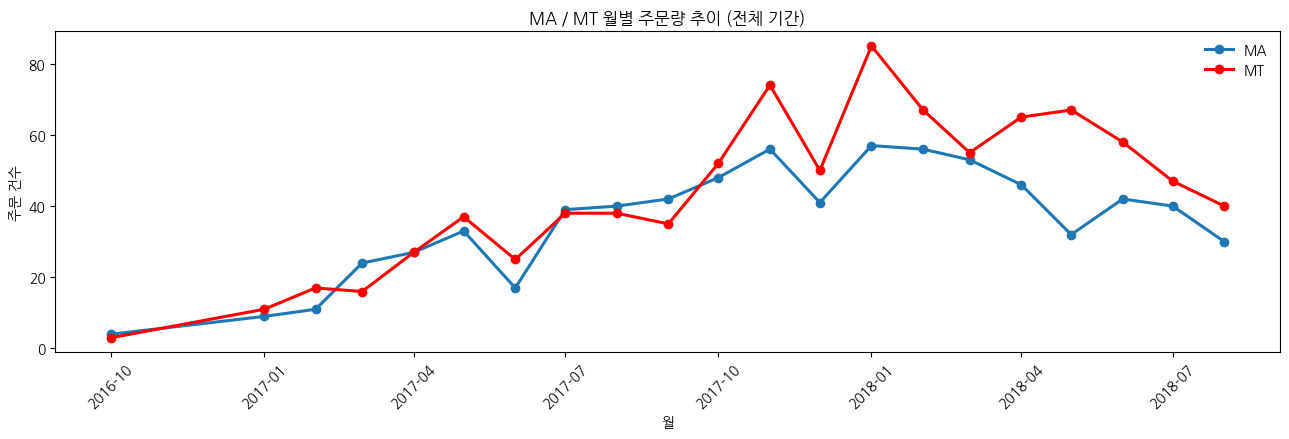

In [ ]:
plt.figure(figsize=(13, 4.5))

for state, color in [('MA', 'tab:blue'), ('MT', 'red')]:
    df_s = monthly_orders[monthly_orders['customer_state'] == state]

    plt.plot(
        df_s['year_month_dt'],
        df_s['n_orders'],
        marker='o',
        linewidth=2.2,
        color=color,
        label=state
    )

plt.title('MA / MT 월별 주문량 추이 (전체 기간)')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.legend(frameon=False)
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

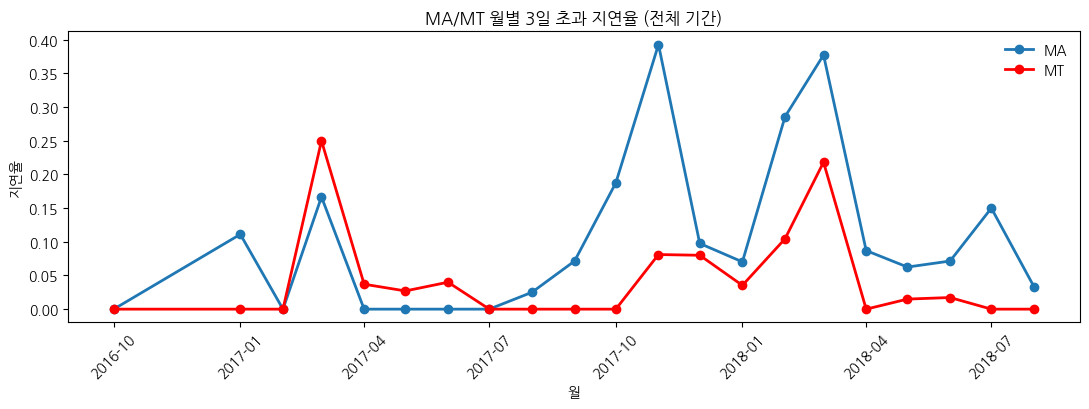

In [ ]:
plt.figure(figsize=(11, 4.2))
for state, color in [('MA', 'tab:blue'), ('MT', 'red')]:
    d = monthly[monthly['customer_state'] == state]
    plt.plot(d['year_month_dt'], d['delay_over_3_rate'], marker='o', linewidth=2.0, color=color, label=state)
plt.title('MA/MT 월별 3일 초과 지연율 (전체 기간)')
plt.xlabel('월')
plt.ylabel('지연율')
plt.grid(False)
plt.legend(frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
start = pd.Timestamp('2016-10-01')
end   = pd.Timestamp('2017-08-31')

df_w = orders.loc[orders['order_purchase_timestamp'].between(start, end)].copy()
df_w['year_week'] = df_w['order_purchase_timestamp'].dt.to_period('W')

weekly = (
    df_w.groupby(['year_week', 'customer_state'], as_index=False)
        .agg(
            n_orders=('order_id', 'count'),
            n_delay_over_3=('delay_over_3', 'sum')
        )
)
weekly['delay_over_3_rate'] = weekly['n_delay_over_3'] / weekly['n_orders']
weekly['year_week_dt'] = weekly['year_week'].dt.to_timestamp()
weekly = weekly.sort_values(['customer_state', 'year_week_dt'])

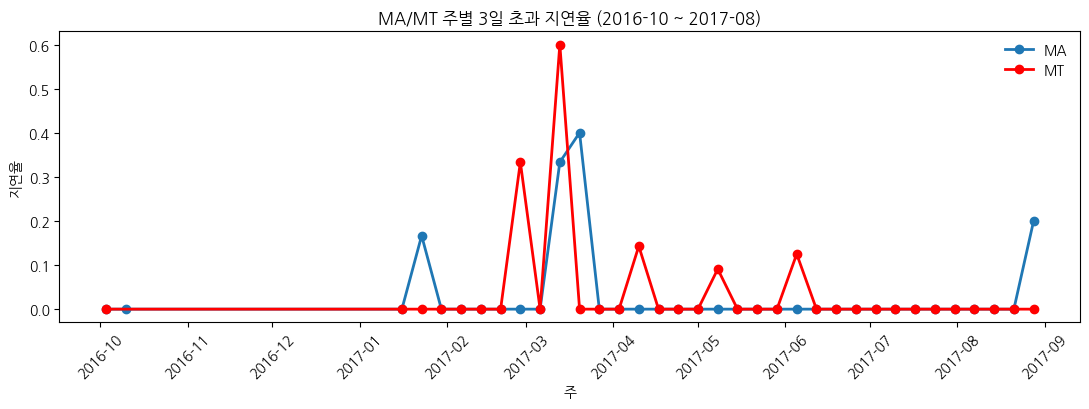

In [ ]:
plt.figure(figsize=(11, 4.2))
for state, color in [('MA', 'tab:blue'), ('MT', 'red')]:
    d = weekly[weekly['customer_state'] == state]
    plt.plot(d['year_week_dt'], d['delay_over_3_rate'], marker='o', linewidth=2.0, color=color, label=state)
plt.title('MA/MT 주별 3일 초과 지연율 (2016-10 ~ 2017-08)')
plt.xlabel('주')
plt.ylabel('지연율')
plt.grid(False)
plt.legend(frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### (3) 강수량 분석

In [196]:
df = orders[['order_id', 'customer_id',
             'order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']].merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)
date_cols = [
    'order_purchase_timestamp',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

# 월 기준 (시계열 집계 핵심)
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_state,order_month,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,SP,2017-10,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,BA,2018-07,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,GO,2018-08,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,RN,2017-11,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,SP,2018-02,2018,2


In [197]:
df = df[
    (df['year'].between(2016, 2018)) &
    (df['customer_state'].isin(['MA', 'MT']))
].copy()

In [198]:
df['is_delayed'] = (
    (df['order_delivered_customer_date'].notna()) &
    (df['order_estimated_delivery_date'].notna()) &
    (df['order_delivered_customer_date'] >
     df['order_estimated_delivery_date'])
).astype(int)

In [199]:
monthly_kpi = (
    df.groupby(['year', 'month', 'customer_state'], as_index=False)
      .agg(
          orders=('order_id', 'nunique'),
          delayed_rate=('is_delayed', 'mean')
      )
      .rename(columns={'customer_state': 'state'})
)
monthly_kpi.head()

,year,month,state,orders,delayed_rate
0,2016,10,MA,4,0.250000
1,2016,10,MT,3,0.000000
2,2017,1,MA,9,0.111111
3,2017,1,MT,11,0.000000
4,2017,2,MA,11,0.000000


In [200]:
df['is_delayed'] = (
    (df['order_delivered_customer_date'].notna()) &
    (df['order_estimated_delivery_date'].notna()) &
    (df['order_delivered_customer_date'] > df['order_estimated_delivery_date'])
).astype(int)

In [201]:
ma = pd.DataFrame({
    'state': ['MA'] * 12,
    'month': list(range(1, 13)),
    'precip_mm':  [250,  370,  450,  420,  315,  170,   70,   20,    5,   15,   20,   65]
})
ma

,state,month,precip_mm
0,MA,1,250
1,MA,2,370
2,MA,3,450
3,MA,4,420
4,MA,5,315
5,MA,6,170
6,MA,7,70
7,MA,8,20
8,MA,9,5
9,MA,10,15


In [202]:
mt = pd.DataFrame({
    'state': ['MT'] * 12,
    'month': list(range(1, 13)),
    'precip_mm':  [215,  200,  180,   85,   35,   10,    5,   15,   50,  120,  165,  210]
})
mt

,state,month,precip_mm
0,MT,1,215
1,MT,2,200
2,MT,3,180
3,MT,4,85
4,MT,5,35
5,MT,6,10
6,MT,7,5
7,MT,8,15
8,MT,9,50
9,MT,10,120


In [203]:
weather = pd.concat([ma, mt], ignore_index=True)
weather

,state,month,precip_mm
0,MA,1,250
1,MA,2,370
2,MA,3,450
3,MA,4,420
4,MA,5,315
5,MA,6,170
6,MA,7,70
7,MA,8,20
8,MA,9,5
9,MA,10,15


In [205]:
final_df = monthly_kpi.merge(
    weather,
    on=['state', 'month'],
    how='left'
)
final_df

,year,month,state,orders,delayed_rate,precip_mm
0,2016,10,MA,4,0.250000,15
1,2016,10,MT,3,0.000000,120
2,2017,1,MA,9,0.111111,250
3,2017,1,MT,11,0.000000,215
4,2017,2,MA,11,0.000000,370
5,2017,2,MT,17,0.000000,200
6,2017,3,MA,24,0.208333,450
7,2017,3,MT,16,0.375000,180
8,2017,4,MA,27,0.037037,420
9,2017,4,MT,27,0.074074,85


In [207]:
final_df.sort_values(['year', 'month', 'state'], inplace=True)
final_df.reset_index(drop=True, inplace=True)
final_df

,year,month,state,orders,delayed_rate,precip_mm
0,2016,10,MA,4,0.250000,15
1,2016,10,MT,3,0.000000,120
2,2017,1,MA,9,0.111111,250
3,2017,1,MT,11,0.000000,215
4,2017,2,MA,11,0.000000,370
5,2017,2,MT,17,0.000000,200
6,2017,3,MA,24,0.208333,450
7,2017,3,MT,16,0.375000,180
8,2017,4,MA,27,0.037037,420
9,2017,4,MT,27,0.074074,85


In [208]:
full_index = pd.MultiIndex.from_product([['MA','MT'], range(1,13)], names=['state','month'])
final_df = (final_df.set_index(['state','month'])
                     .reindex(full_index)
                     .reset_index())

# precip_mm은 weather에 항상 있으니 채워지고, delayed_rate는 주문 없으면 NaN일 수 있음
# lineplot 끊김이 싫으면 0으로 채우거나 forward fill 가능. 여기서는 0으로 처리(선택)
final_df['delayed_rate'] = final_df['delayed_rate'].fillna(0)
final_df['orders'] = final_df['orders'].fillna(0)

ValueError: cannot handle a non-unique multi-index!

In [ ]:
# 4) MA/MT 각각 그리기 함수
# =========================
def plot_state(state_code: str):
    d = season_df[season_df['state'] == state_code].copy()

    # 우기/건기: precip_mm 기준 상위3 / 하위3 월
    # (동률이 많으면 month 순으로 먼저 나옴)
    top3_months = d.nlargest(3, 'precip_mm')['month'].tolist()
    bot3_months = d.nsmallest(3, 'precip_mm')['month'].tolist()

    def season_label(m):
        if m in top3_months:
            return '우기'
        if m in bot3_months:
            return '건기'
        return '기타'

    d['season'] = d['month'].apply(season_label)

    # bar 색/효과 지정 (기타는 "블러" 느낌: 옅은 회색 + alpha + hatch)
    bar_colors = []
    bar_alphas = []
    bar_hatches = []

    for s in d['season']:
        if s == '우기':
            bar_colors.append('tab:blue')
            bar_alphas.append(0.95)
            bar_hatches.append(None)
        elif s == '건기':
            bar_colors.append('tab:orange')
            bar_alphas.append(0.95)
            bar_hatches.append(None)
        else:
            bar_colors.append('lightgray')
            bar_alphas.append(0.18)      # 블러처럼 아주 흐리게
            bar_hatches.append('////')   # 흐림 강조(원치 않으면 None)

    fig, ax1 = plt.subplots(figsize=(10, 5))

### (4) 지역별 월별 주문량

In [ ]:
monthly_region_orders = (
    orders
    .groupby(['region', 'year_month'], as_index=False)
    .agg(n_orders=('order_id', 'count'))
)

# region별 통계 요약
region_stats = (
    monthly_region_orders
    .groupby('region', as_index=False)
    .agg(
        avg_monthly_orders = ('n_orders', 'mean'),
        std_monthly_orders=('n_orders', 'std'),
        total_orders=('n_orders', 'sum')
    )
)

region_stats

,region,avg_monthly_orders,std_monthly_orders,total_orders
0,NW,112.636364,53.594194,2478
1,SE,3878.520000,2639.943483,96963


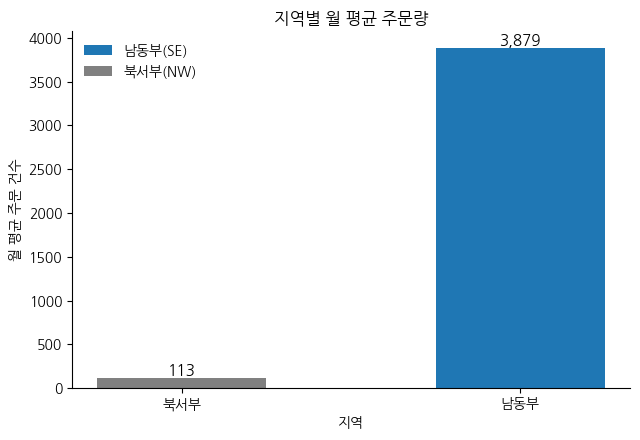

In [ ]:
color_map = {
    'SE': 'tab:blue',
    'NW': 'gray'
}

xlabel_map = {
    'SE': '남동부',
    'NW': '북서부'
}

# =========================
# Barplot
# =========================
fig, ax = plt.subplots(figsize=(6.5, 4.5))

bars = ax.bar(
    region_stats['region'].map(xlabel_map),
    region_stats['avg_monthly_orders'],
    color=[color_map[r] for r in region_stats['region']],
    width=0.5
)

# 제목 / 축
ax.set_title('지역별 월 평균 주문량')
ax.set_xlabel('지역')
ax.set_ylabel('월 평균 주문 건수')

# 값 라벨
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=11
    )

# =========================
# 범례 (Patch 사용)
# =========================
legend_elements = [
    Patch(facecolor='tab:blue', label='남동부(SE)'),
    Patch(facecolor='gray', label='북서부(NW)')
]

ax.legend(
    handles=legend_elements,
    frameon=False,
    loc='upper left'
)

# 스타일 정리
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

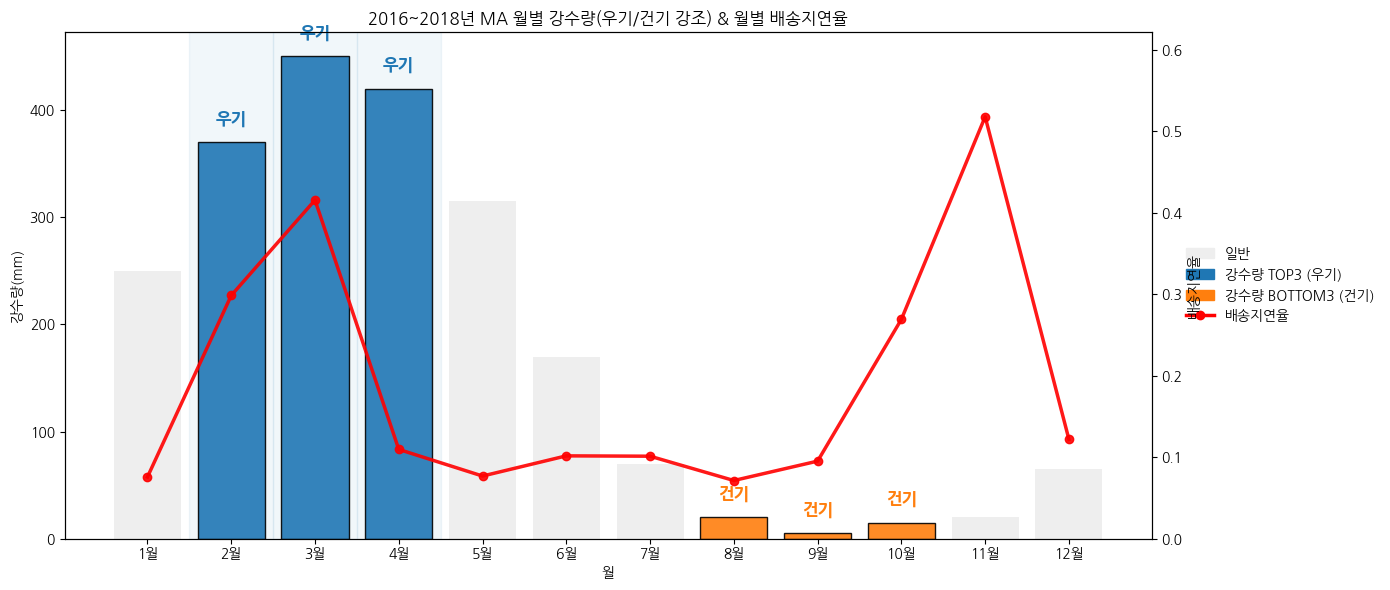

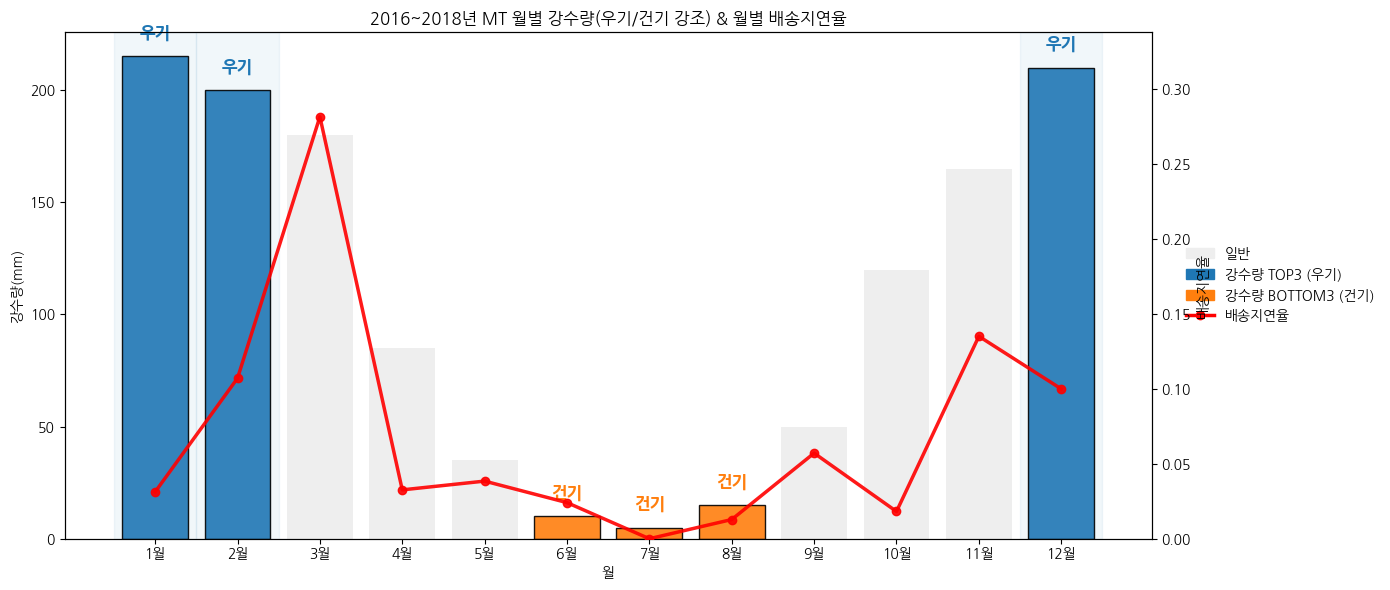

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# =========================================================
# 0) 한글 폰트 세팅
# =========================================================
available_fonts = [f.name for f in font_manager.fontManager.ttflist]
for font_name in ['Malgun Gothic', 'AppleGothic', 'NanumGothic']:
    if font_name in available_fonts:
        rc('font', family=font_name)
        break
plt.rcParams['axes.unicode_minus'] = False


# =========================================================
# 1) 2016~2018 주문 데이터 기반: 월별(1~12) 배송지연율 만들기
#    - "계절성(월)"을 보기 위해 year는 필터만 하고 month로 합산
# =========================================================
df = orders[['order_id', 'customer_id',
             'order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']].merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

for c in ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month

df = df[
    df['year'].between(2016, 2018) &
    df['customer_state'].isin(['MA', 'MT'])
].copy()

df['is_delayed'] = (
    df['order_delivered_customer_date'].notna() &
    df['order_estimated_delivery_date'].notna() &
    (df['order_delivered_customer_date'] > df['order_estimated_delivery_date'])
).astype(int)

delay_monthly = (
    df.groupby(['customer_state', 'month'], as_index=False)
      .agg(
          orders=('order_id', 'nunique'),
          delayed_rate=('is_delayed', 'mean')
      )
      .rename(columns={'customer_state': 'state'})
)

# =========================================================
# 2) 기후 데이터(ma, mt) 합치기
#    - 최소: state, month, precip_mm
# =========================================================
weather = pd.concat([ma, mt], ignore_index=True)
weather = weather[['state', 'month', 'precip_mm']].copy()

# =========================================================
# 3) 시각화용 테이블 만들기 (state, month 기준)
#    - 1~12월 골격 강제로 맞춤
# =========================================================
season_df = delay_monthly.merge(weather, on=['state', 'month'], how='left')
season_df = season_df.sort_values(['state', 'month']).reset_index(drop=True)

full_index = pd.MultiIndex.from_product([['MA', 'MT'], range(1, 13)], names=['state', 'month'])
season_df = (season_df.set_index(['state', 'month'])
                     .reindex(full_index)
                     .reset_index())

# 주문이 없는 달은 delayed_rate가 NaN일 수 있음 → 0으로 (원하면 유지 가능)
season_df['delayed_rate'] = season_df['delayed_rate'].fillna(0)
season_df['orders'] = season_df['orders'].fillna(0)


# =========================================================
# 4) 스타일 동일하게: 우기/건기 강조 + 나머지 흐림 + 빨강 line
# =========================================================
def plot_state_style_like_example(state_code: str, title_year_text: str = "2016~2018"):
    d = season_df[season_df['state'] == state_code].copy()

    # 우기/건기: precip_mm 기준 상위3 / 하위3 월
    top3_months = d.nlargest(3, 'precip_mm')['month'].tolist()
    bot3_months = d.nsmallest(3, 'precip_mm')['month'].tolist()

    def season_label(m):
        if m in top3_months:
            return '우기'
        if m in bot3_months:
            return '건기'
        return '일반'

    d['season'] = d['month'].apply(season_label)

    # ---- bar 스타일(이미지처럼)
    bar_colors = []
    bar_edges = []
    bar_alphas = []

    for s in d['season']:
        if s == '우기':
            bar_colors.append('#1f77b4')   # 진한 파랑
            bar_edges.append('black')
            bar_alphas.append(0.9)
        elif s == '건기':
            bar_colors.append('#ff7f0e')   # 주황
            bar_edges.append('black')
            bar_alphas.append(0.9)
        else:
            bar_colors.append('#eeeeee')   # 아주 연한 회색
            bar_edges.append(None)
            bar_alphas.append(1.0)

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # ---- 우기 구간 배경(연한 파란 영역)
    for m in top3_months:
        ax1.axvspan(m - 0.5, m + 0.5, color='#1f77b4', alpha=0.06, zorder=0)

    # ---- 강수량 bar
    bars = ax1.bar(
    d['month'],
    d['precip_mm'],
    color=bar_colors,
    linewidth=1,
    zorder=2)

    for b, s, a in zip(bars, d['season'], bar_alphas):
        b.set_alpha(a)
        if s in ('우기', '건기'):
            b.set_edgecolor('black')
            b.set_linewidth(1)
        else:
            b.set_edgecolor('none')

    ax1.set_xlabel('월')
    ax1.set_ylabel('강수량(mm)')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([f'{i}월' for i in range(1, 13)])

    # ---- bar 위 라벨(우기/건기만)
    y_max = d['precip_mm'].max()
    for m, p, s in zip(d['month'], d['precip_mm'], d['season']):
        if s == '우기':
            ax1.text(m, p + y_max * 0.03, '우기',
                     ha='center', va='bottom',
                     color='#1f77b4', fontsize=12, weight='bold')
        elif s == '건기':
            ax1.text(m, p + y_max * 0.03, '건기',
                     ha='center', va='bottom',
                     color='#ff7f0e', fontsize=12, weight='bold')

    # ---- 배송지연율 lineplot (빨강)
    ax2 = ax1.twinx()
    ax2.plot(
        d['month'],
        d['delayed_rate'],
        color='red',          # ✅ 요청: 빨강
        marker='o',
        linewidth=2.5,
        alpha=0.9,
        zorder=3
    )
    ax2.set_ylabel('배송지연율')
    ax2.set_ylim(0, max(0.01, d['delayed_rate'].max() * 1.2))

    # ---- 제목(스타일 유사)
    ax1.set_title(f'{title_year_text}년 {state_code} 월별 강수량(우기/건기 강조) & 월별 배송지연율')

    # ---- 범례(오른쪽 바깥, 한글)
    legend_items = [
        mpatches.Patch(color='#eeeeee', label='일반'),
        mpatches.Patch(color='#1f77b4', label='강수량 TOP3 (우기)'),
        mpatches.Patch(color='#ff7f0e', label='강수량 BOTTOM3 (건기)'),
        mlines.Line2D([], [], color='red', marker='o', linewidth=2.5, label='배송지연율')
    ]
    ax1.legend(
        handles=legend_items,
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
        frameon=False
    )

    plt.tight_layout()
    plt.show()


# =========================================================
# 5) MA / MT 각각 출력
# =========================================================
plot_state_style_like_example('MA', title_year_text="2016~2018")
plot_state_style_like_example('MT', title_year_text="2016~2018")


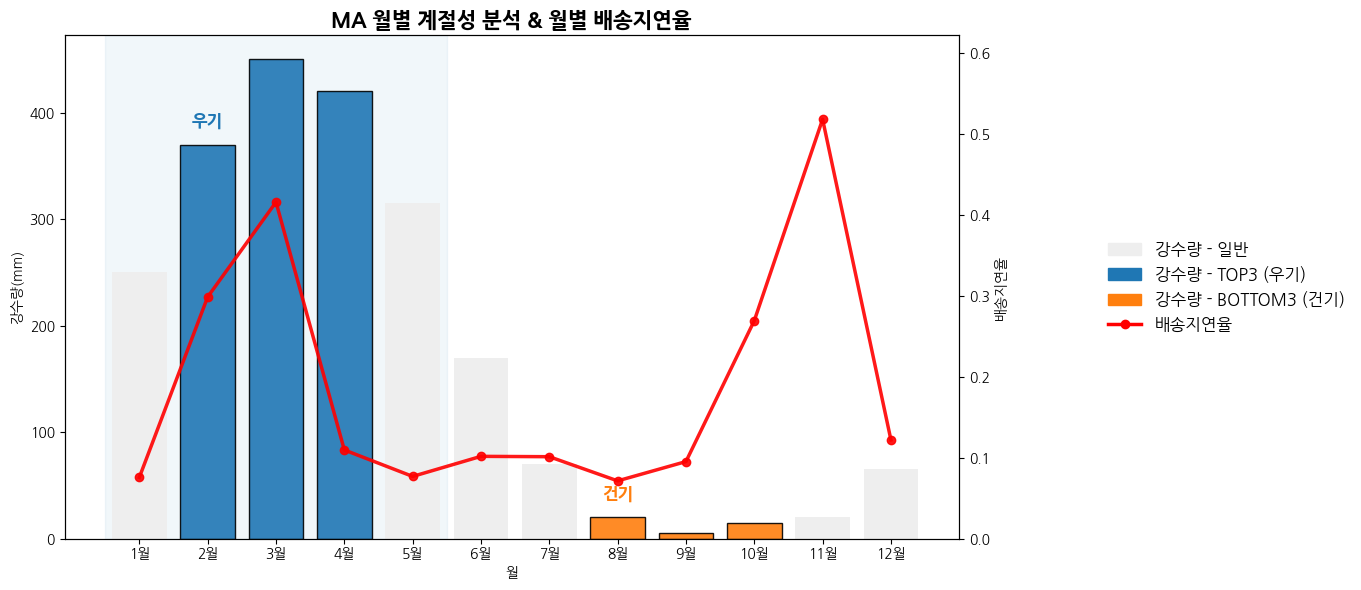

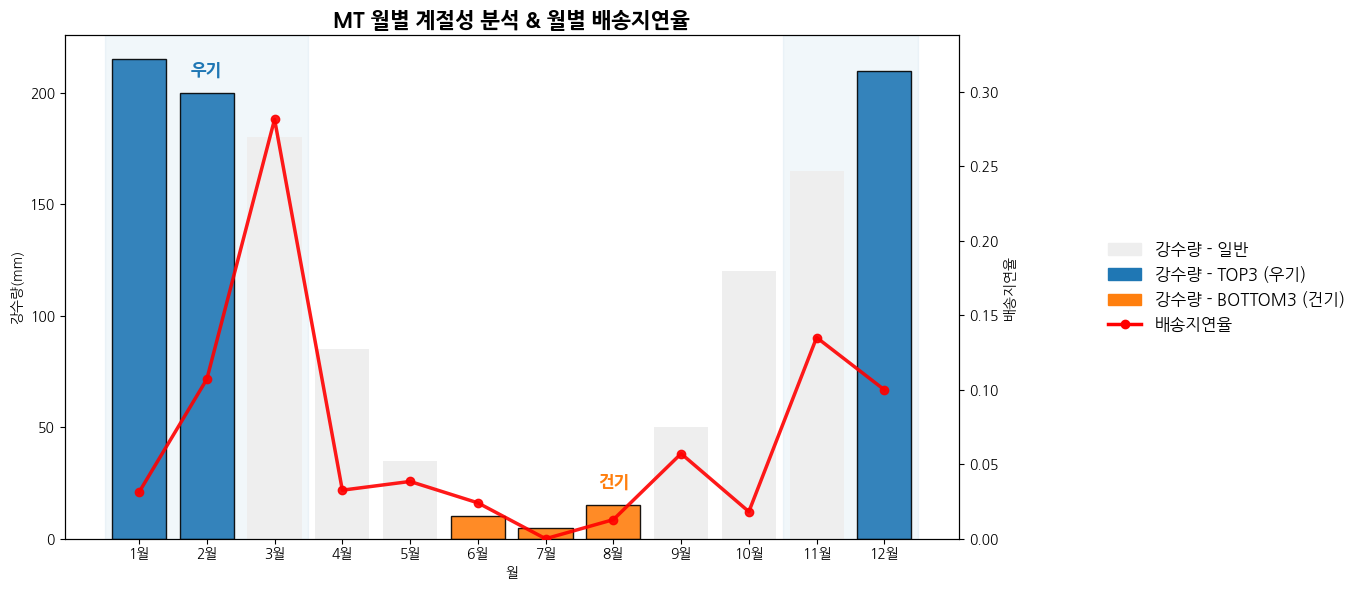

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# =========================================================
# 0) 한글 폰트 세팅
# =========================================================
available_fonts = [f.name for f in font_manager.fontManager.ttflist]
for font_name in ['Malgun Gothic', 'AppleGothic', 'NanumGothic']:
    if font_name in available_fonts:
        rc('font', family=font_name)
        break
plt.rcParams['axes.unicode_minus'] = False


# =========================================================
# 1) 2016~2018 주문 데이터 기반: 월별(1~12) 배송지연율 만들기
#    - "계절성(월)"을 보기 위해 year는 필터만 하고 month로 합산
# =========================================================
df = orders[['order_id', 'customer_id',
             'order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']].merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

for c in ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month

df = df[
    df['year'].between(2016, 2018) &
    df['customer_state'].isin(['MA', 'MT'])
].copy()

df['is_delayed'] = (
    df['order_delivered_customer_date'].notna() &
    df['order_estimated_delivery_date'].notna() &
    (df['order_delivered_customer_date'] > df['order_estimated_delivery_date'])
).astype(int)

delay_monthly = (
    df.groupby(['customer_state', 'month'], as_index=False)
      .agg(
          orders=('order_id', 'nunique'),
          delayed_rate=('is_delayed', 'mean')
      )
      .rename(columns={'customer_state': 'state'})
)

# =========================================================
# 2) 기후 데이터(ma, mt) 합치기
#    - 최소: state, month, precip_mm
# =========================================================
weather = pd.concat([ma, mt], ignore_index=True)
weather = weather[['state', 'month', 'precip_mm']].copy()

# =========================================================
# 3) 시각화용 테이블 만들기 (state, month 기준)
#    - 1~12월 골격 강제로 맞춤
# =========================================================
season_df = delay_monthly.merge(weather, on=['state', 'month'], how='left')
season_df = season_df.sort_values(['state', 'month']).reset_index(drop=True)

full_index = pd.MultiIndex.from_product([['MA', 'MT'], range(1, 13)], names=['state', 'month'])
season_df = (season_df.set_index(['state', 'month'])
                     .reindex(full_index)
                     .reset_index())

season_df['delayed_rate'] = season_df['delayed_rate'].fillna(0)
season_df['orders'] = season_df['orders'].fillna(0)


# =========================================================
# 4) 유틸: 특정 월 리스트를 "연속 구간"으로 묶기
#    예) [1,2,3,5,6] -> [(1,3), (5,6)]
# =========================================================
def month_to_ranges(months):
    if not months:
        return []
    ms = sorted(set(months))
    ranges = []
    start = prev = ms[0]
    for m in ms[1:]:
        if m == prev + 1:
            prev = m
        else:
            ranges.append((start, prev))
            start = prev = m
    ranges.append((start, prev))
    return ranges


# =========================================================
# 5) 스타일: 우기/건기 글씨는 "3번째 bar"에만 1회 표기
#    - 강수량 TOP5는 연한 파랑 배경을 "연속구간"으로 연결
#    - 범례: 더 크게 + 더 오른쪽으로
# =========================================================
def plot_state(state_code: str, title_year_text: str = "2016~2018"):
    d = season_df[season_df['state'] == state_code].copy()

    # 건기/우기 기준: 상위3 / 하위3 (라벨용)
    top3_months = d.nlargest(3, 'precip_mm')['month'].tolist()
    bot3_months = d.nsmallest(3, 'precip_mm')['month'].tolist()

    # 배경 강조 기준: 상위5 (연한 파랑 배경을 연속 구간으로)
    top5_months = d.nlargest(5, 'precip_mm')['month'].tolist()
    top5_ranges = month_to_ranges(top5_months)

    def season_label(m):
        if m in top3_months:
            return '우기'
        if m in bot3_months:
            return '건기'
        return '일반'

    d['season'] = d['month'].apply(season_label)

    # bar 스타일
    bar_colors = []
    bar_alphas = []
    for s in d['season']:
        if s == '우기':
            bar_colors.append('#1f77b4')
            bar_alphas.append(0.9)
        elif s == '건기':
            bar_colors.append('#ff7f0e')
            bar_alphas.append(0.9)
        else:
            bar_colors.append('#eeeeee')
            bar_alphas.append(1.0)

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # --- (A) TOP5 연한 파랑 배경: 연속 구간으로 이어 붙이기
    for start_m, end_m in top5_ranges:
        ax1.axvspan(start_m - 0.5, end_m + 0.5, color='#1f77b4', alpha=0.06, zorder=0)

    # --- (B) 강수량 bar
    bars = ax1.bar(
        d['month'],
        d['precip_mm'],
        color=bar_colors,
        linewidth=1,
        zorder=2
    )

    # bar별 테두리/alpha 적용 (edgecolor None 에러 방지)
    for b, s, a in zip(bars, d['season'], bar_alphas):
        b.set_alpha(a)
        if s in ('우기', '건기'):
            b.set_edgecolor('black')
            b.set_linewidth(1)
        else:
            b.set_edgecolor('none')

    ax1.set_xlabel('월')
    ax1.set_ylabel('강수량(mm)')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([f'{i}월' for i in range(1, 13)])

    # --- (C) 우기/건기 텍스트는 "3번째 bar"에 1회만 표기
    y_max = d['precip_mm'].max()
    # 3번째 bar -> (상위3 중에서) precip 큰 순 3번째 달
    top3_sorted = d[d['month'].isin(top3_months)].sort_values('precip_mm', ascending=False)
    bot3_sorted = d[d['month'].isin(bot3_months)].sort_values('precip_mm', ascending=True)

    # 우기 텍스트: 상위3 중 3번째(=마지막)
    if len(top3_sorted) >= 3:
        m = int(top3_sorted.iloc[2]['month'])
        p = float(top3_sorted.iloc[2]['precip_mm'])
        ax1.text(m, p + y_max * 0.03, '우기',
                 ha='center', va='bottom',
                 color='#1f77b4', fontsize=12, weight='bold')

    # 건기 텍스트: 하위3 중 3번째(=마지막)
    if len(bot3_sorted) >= 3:
        m = int(bot3_sorted.iloc[2]['month'])
        p = float(bot3_sorted.iloc[2]['precip_mm'])
        ax1.text(m, p + y_max * 0.03, '건기',
                 ha='center', va='bottom',
                 color='#ff7f0e', fontsize=12, weight='bold')

    # --- (D) 배송지연율 lineplot (빨강)
    ax2 = ax1.twinx()
    ax2.plot(
        d['month'],
        d['delayed_rate'],
        color='red',
        marker='o',
        linewidth=2.5,
        alpha=0.9,
        zorder=3
    )
    ax2.set_ylabel('배송지연율')
    ax2.set_ylim(0, max(0.01, d['delayed_rate'].max() * 1.2))

    # --- (E) 제목
    ax1.set_title(f'{state_code} 월별 계절성 분석 & 월별 배송지연율',fontsize=15, fontweight='bold')


    # --- (F) 범례: 더 크게 + 더 오른쪽으로 이동
    legend_items = [
        mpatches.Patch(color='#eeeeee', label='강수량 - 일반'),
        mpatches.Patch(color='#1f77b4', label='강수량 - TOP3 (우기)'),
        mpatches.Patch(color='#ff7f0e', label='강수량 - BOTTOM3 (건기)'),
        mlines.Line2D([], [], color='red', marker='o', linewidth=2.5, label='배송지연율')
    ]
    ax1.legend(
        handles=legend_items,
        loc='center left',
        bbox_to_anchor=(1.15, 0.5),  # 더 오른쪽
        frameon=False,
        fontsize=12                  # 글자 키움
    )

    plt.tight_layout()
    plt.show()


# =========================================================
# 6) MA / MT 각각 출력
# =========================================================
plot_state('MA', title_year_text="2016~2018")
plot_state('MT', title_year_text="2016~2018")


### (5) 리뷰스코어 배송지연율 히트맵

In [218]:
orders_base = orders[[
    'order_id',
    'customer_state',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]].copy()

orders_base['order_delivered_customer_date'] = pd.to_datetime(
    orders_base['order_delivered_customer_date'], errors='coerce'
)
orders_base['order_estimated_delivery_date'] = pd.to_datetime(
    orders_base['order_estimated_delivery_date'], errors='coerce'
)

orders_base['delay_days'] = (
    orders_base['order_delivered_customer_date']
    - orders_base['order_estimated_delivery_date']
).dt.days

# 2) 리뷰 점수 (df_main or reviews 중 실제 가진 걸 쓰면 됨)
review_base = df_main[['order_id', 'review_score']].copy()
# 만약 reviews 테이블이면: review_base = reviews[['order_id','review_score']].copy()

# 3) merge
df_state_delay_review = orders_base.merge(
    review_base,
    on='order_id',
    how='inner'   # 리뷰 없는 주문 제외 (원하면 left로 바꿔)
)

# 4) 최종 필수 컬럼만 + 결측 제거
df_state_delay_review = df_state_delay_review.dropna(
    subset=['customer_state', 'review_score', 'delay_days']
)[['customer_state', 'review_score', 'delay_days']]


In [219]:
bins = [-np.inf, 0, 3, 7, 14, np.inf]
labels = ['정시/조기', '1-3일지연', '4-7일지연', '1-2주지연', '2주이상지연']

df_state_delay_review['delay_bin'] = pd.cut(
    df_state_delay_review['delay_days'],
    bins=bins,
    labels=labels,
    right=True
)

/tmp/ipython-input-1057474065.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


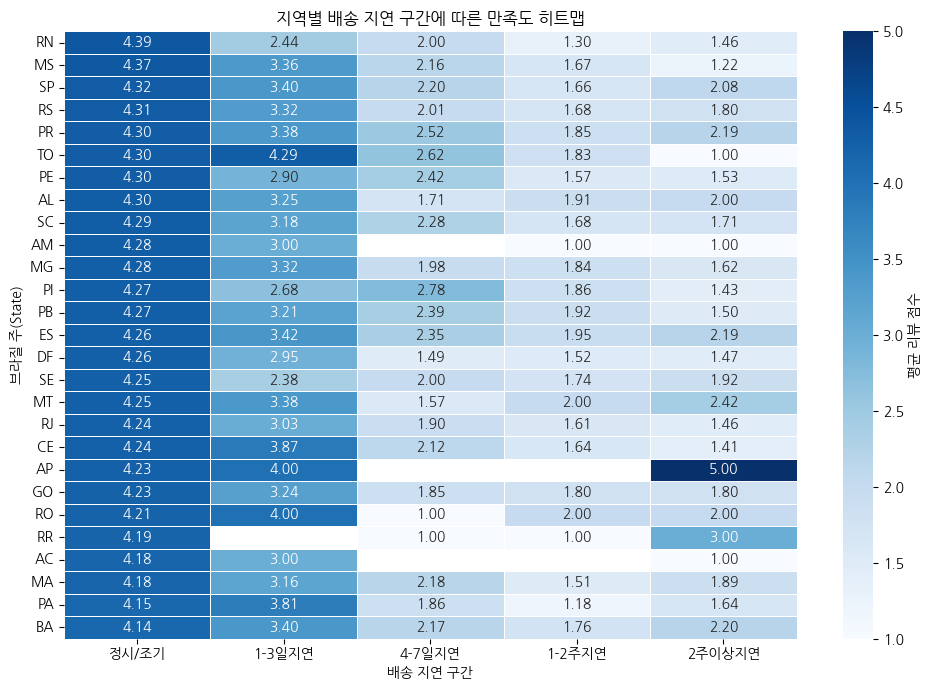

In [221]:
heat = (
    df_state_delay_review
    .pivot_table(
        index='customer_state',
        columns='delay_bin',
        values='review_score',
        aggfunc='mean'
    )
    .reindex(columns=labels)  # 구간 순서 고정
)

# (선택) 정시/조기 만족도 높은 주부터 정렬
heat = heat.sort_values(by='정시/조기', ascending=False)

# ===== 2) 히트맵 시각화 =====
plt.figure(figsize=(10, 7))
ax = sns.heatmap(
    heat,
    cmap='Blues',
    vmin=1, vmax=5,          # 리뷰 점수 스케일 고정
    annot=True, fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': '평균 리뷰 점수'}
)

ax.set_title('지역별 배송 지연 구간에 따른 만족도 히트맵')
ax.set_xlabel('배송 지연 구간')
ax.set_ylabel('브라질 주(State)')

plt.tight_layout()
plt.show()

In [222]:
ap_mean_delay = (
    df_state_delay_review
    .loc[df_state_delay_review['customer_state'] == 'AP', 'delay_days']
    .mean()
)

ap_mean_delay

np.float64(-19.727272727272727)

In [223]:
ap_14plus = df_state_delay_review[
    (df_state_delay_review['customer_state'] == 'AP') &
    (df_state_delay_review['delay_days'] >= 14)
]

ap_14plus

,customer_state,review_score,delay_days,delay_bin
60750,AP,5.0,144.0,2주이상지연


In [224]:
ap_14plus.shape[0]

1

In [225]:
ap_mean_delay = (
    df_state_delay_review
    .loc[df_state_delay_review['customer_state'] == 'RR', 'delay_days']
    .mean()
)

ap_mean_delay

np.float64(-17.29268292682927)

In [226]:
ap_14plus = df_state_delay_review[
    (df_state_delay_review['customer_state'] == 'RR') &
    (df_state_delay_review['delay_days'] >= 14)
]

ap_14plus

,customer_state,review_score,delay_days,delay_bin
72932,RR,5.0,132.0,2주이상지연
93929,RR,1.0,29.0,2주이상지연


In [228]:
ap_14plus.shape[0]

2